In [4]:
# Mathematical operations
import math

# Machine learning datasets utility
import machine_learning_datasets as mldatasets

# Data manipulation and analysis
import pandas as pd
import numpy as np

# Scikit-learn preprocessing and modeling tools
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics, linear_model, tree, naive_bayes, neighbors, ensemble, neural_network, svm

# Specialized interpretable models
from rulefit import RuleFit  # Rule-based model extraction
import statsmodels.api as sm  # Statistical modeling for detailed regression analysis

# Explainable AI libraries
from interpret.glassbox import ExplainableBoostingClassifier  # EBM model
from interpret import show  # Visualization for interpretable models
from interpret.perf import ROC  # ROC curve analysis

# Deep learning and specialized GAM
import tensorflow as tf
from gaminet import GAMINet  # Generalized Additive Model with Interactions
from gaminet.utils import (plot_trajectory, plot_regularization,
                           local_visualize, global_visualize_density,
                           feature_importance_visualize)

# Visualization
import matplotlib.pyplot as plt

# Understanding and Preparing the Data

In [5]:
# Picture yourself, a data science consultant, in a conference room in Fort Worth, Texas, during early 
# January 2019. In this conference room, executives for one of the world’s largest airlines, American 
# Airlines (AA), are briefing you on their On-Time Performance (OTP). OTP is a widely accepted Key 
# Performance Indicator (KPI) for flight punctuality. It is measured as the percentage of flights that ar
# rived within 15 minutes of the scheduled arrival. It turns out that AA has achieved an OTP of just over 
# 80% for 3 years in a row, which is acceptable, and a significant improvement, but they are still ninth 
# in the world and fifth in North America. To brag about it next year in their advertising, they aspire to 
# achieve, at least, number one in North America for 2019, besting their biggest rivals.
                                          
# On the financial front, it is estimated that delays cost the airline close to $2 billion, so reducing this 
# by 25–35% to be on parity with their competitors could produce sizable savings. And it is estimated 
# that it costs passengers just as much due to tens of millions of lost hours. A reduction in delays would 
# result in happier customers, which could lead to an increase in ticket sales.
# Your task is to create models that can accurately predict delays for domestic flights only. What they 
# hope to gain from the models is the following:

# • To understand what factors impacted domestic arrival delays the most in 2018

# • To anticipate a delay caused by the airline in midair with enough accuracy to mitigate some 
# of these factors in 2019

# But not all delays are made equal. The International Air Transport Association (IATA) has over 80 
# delay codes ranging from 14 (oversales booking errors) to 75 (de-icing of aircraft, removal of ice/snow, frost 
# prevention). Some are preventable, and others unavoidable.

# The airline executives told you that the airline is not, for now, interested in predicting delays caused 
# by events out of their control, such as extreme weather, security events, and air traffic control issues. 
# They are also not interested in delays caused by late arrivals from previous flights using the same 
# aircraft because this was not the root cause. Nevertheless, they would like to know the effect of a 
# busy hub on avoidable delays even if this has to do with congestion because, after all, perhaps there’s 
# something they can do with flight scheduling or flight speed, or even gate selection. And while they 
# understand that international flights occasionally impact domestic flights, they hope to tackle the 
# sizeable local market first.

# Executives have provided you with a dataset from the United States Department of Transportation 
# Bureau of Transportation Statistics with all 2018 AA domestic flights.

In [13]:
# Load American Airlines domestic flight delays dataset from 2018
# Dataset contains ~900k flight records with delay information

# aad18_df = mldatasets.load("aa-domestic-delays-2018")
aad18_df = pd.read_csv("data/aa-domestic-delays-2018.csv/aa-domestic-delays-2018.csv")

In [14]:
aad18_df

,FL_NUM,ORIGIN,DEST,PLANNED_DEP_DATETIME,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_AFPH,DEP_RFPH,TAXI_OUT,...,DISTANCE,CRS_ARR_TIME,ARR_AFPH,ARR_RFPH,ARR_DELAY,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,419,DCA,DFW,2018-01-01 11:55:00,1155,1149.0,-6.0,34.444444,0.956790,14.0,...,1192.0,1434,74.347826,0.854573,-14.0,0.0,0.0,0.0,0.0,0.0
1,419,DFW,DCA,2018-01-01 07:05:00,705,700.0,-5.0,17.454545,0.242424,16.0,...,1192.0,1056,30.731707,0.731707,-19.0,0.0,0.0,0.0,0.0,0.0
2,420,DEN,PHL,2018-01-01 11:48:00,1148,1145.0,-3.0,94.736842,0.947368,14.0,...,1558.0,1720,45.882353,1.092437,-9.0,0.0,0.0,0.0,0.0,0.0
3,420,PHL,DEN,2018-01-01 08:25:00,825,824.0,-1.0,33.559322,0.860495,16.0,...,1558.0,1056,74.594595,0.867379,-23.0,0.0,0.0,0.0,0.0,0.0
4,421,DCA,CLT,2018-01-01 11:55:00,1155,1147.0,-8.0,33.461538,0.929487,13.0,...,331.0,1334,90.612245,1.006803,-11.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899522,1815,DCA,CLT,2018-12-31 15:34:00,1534,1530.0,-4.0,35.357143,0.822259,20.0,...,331.0,1714,57.818182,0.837945,-5.0,0.0,0.0,0.0,0.0,0.0
899523,1816,CLT,DFW,2018-12-31 17:51:00,1751,1757.0,6.0,71.818182,1.040843,18.0,...,936.0,1952,60.000000,0.697674,1.0,0.0,0.0,0.0,0.0,0.0
899524,1817,CLT,MEM,2018-12-31 20:15:00,2015,2010.0,-5.0,63.272727,1.193825,36.0,...,511.0,2107,3.380282,0.482897,11.0,0.0,0.0,0.0,0.0,0.0
899525,1818,CLT,RDU,2018-12-31 13:00:00,1300,1323.0,23.0,70.843373,0.770037,11.0,...,130.0,1350,18.648649,0.888031,14.0,0.0,0.0,0.0,0.0,0.0


In [15]:
# Display dataset structure and information
# This shows 899,527 flights with 23 columns including delays, times, and distances
print(aad18_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899527 entries, 0 to 899526
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   FL_NUM                899527 non-null  int64  
 1   ORIGIN                899527 non-null  object 
 2   DEST                  899527 non-null  object 
 3   PLANNED_DEP_DATETIME  899527 non-null  object 
 4   CRS_DEP_TIME          899527 non-null  int64  
 5   DEP_TIME              899527 non-null  float64
 6   DEP_DELAY             899527 non-null  float64
 7   DEP_AFPH              899527 non-null  float64
 8   DEP_RFPH              899527 non-null  float64
 9   TAXI_OUT              899527 non-null  float64
 10  WHEELS_OFF            899527 non-null  float64
 11  CRS_ELAPSED_TIME      899527 non-null  float64
 12  PCT_ELAPSED_TIME      899527 non-null  float64
 13  DISTANCE              899527 non-null  float64
 14  CRS_ARR_TIME          899527 non-null  int64  
 15  

In [16]:
# General features are as follows:
# • FL_NUM: Flight number.
 
# • ORIGIN: Starting airport code (IATA).

# • DEST: Destination airport code (IATA).

# Departure features are as follows:
# • PLANNED_DEP_DATETIME: The planned date and time of the flight.
 
# • CRS_DEP_TIME: The planned departure time.
 
# • DEP_TIME: The actual departure time.

# • DEP_AFPH: The number of actual flights per hour occurring during the interval in between the 
# planned and actual departure from the origin airport (factoring in 30 minutes of padding). The 
# feature tells you how busy the origin airport was during takeoff.

# • DEP_RFPH: The departure relative flights per hour is the ratio of actual flights per hour over 
# the median number of flights per hour that occur at the origin airport at that time of day, day 
# of the week, and month of the year. The feature tells you how relatively busy the origin airport 
# was during takeoff.

# • TAXI_OUT: The time duration elapsed between the departure from the origin airport gate and 
# wheels off.

# • WHEELS_OFF: The point in time that the aircraft’s wheels leave the ground.

# In-flight features are as follows:
# • CRS_ELAPSED_TIME: The planned amount of time needed for the flight trip.

# • PCT_ELAPSED_TIME: The ratio of actual flight time over planned flight time to gauge the plane’s 
# relative speed.

# • DISTANCE: The distance between two airports.

# Arrival features are as follows:
# • CRS_ARR_TIME: The planned arrival time.

# • ARR_AFPH: The number of actual flights per hour occurring during the interval between the 
# planned and actual arrival time at the destination airport (factoring in 30 minutes of padding). 
# The feature tells you how busy the destination airport was during landing.

# • ARR_RFPH: The arrival relative flights per hour is the ratio of actual flights per hour over the 
# median number of flights per hour that occur at the destination airport at that time of day, day 
# of the week, and month of the year. The feature tells you how relatively busy the destination 
# airport was during landing.

# Delay features are as follows:
# • DEP_DELAY: The total delay on departure in minutes.

# • ARR_DELAY: The total delay on arrival in minutes can be subdivided into any or all of the following:

# a. CARRIER_DELAY: The delay in minutes caused by circumstances within the airline’s 
# control (for example, maintenance or crew problems, aircraft cleaning, baggage loading,
# fueling, and so on).

# b. WEATHER_DELAY: The delay in minutes caused by significant meteorological conditions 
# (actual or forecasted).

# c. NAS_DELAY: The delay in minutes mandated by a national aviation system such as 
# non-extreme weather conditions, airport operations, heavy traffic volume, and air 
# traffic control.

# d. SECURITY_DELAY: The delay in minutes caused by the evacuation of a terminal or concourse,
# re-boarding of an aircraft because of a security breach, faulty screening equipment,
# or long lines above 29 minutes in screening areas.

# e. LATE_AIRCRAFT_DELAY: The delay in minutes caused by a previous flight with the same 
# aircraft that arrived late.

## Data Preperation

In [17]:
# Convert planned departure datetime from string to datetime object for manipulation
aad18_df['PLANNED_DEP_DATETIME'] = pd.to_datetime(aad18_df['PLANNED_DEP_DATETIME'])

In [18]:
# Extract temporal features from datetime
# The exact day and time of a flight don’t matter, but maybe the month and day of the week do because 
# of weather and seasonal patterns that can only be appreciated at this level of granularity. Also, the 
# executives mentioned weekends and winters being especially bad for delays
aad18_df['DEP_MONTH'] = aad18_df['PLANNED_DEP_DATETIME'].dt.month  # Month (1-12)
aad18_df['DEP_DOW'] = aad18_df['PLANNED_DEP_DATETIME'].dt.dayofweek  # Day of week (0-6)

In [19]:
# Remove the original datetime column as we've extracted needed features
aad18_df = aad18_df.drop(['PLANNED_DEP_DATETIME'], axis=1)

In [20]:
# It is essential to record whether the arrival or destination airport is a hub. AA, in 2019, had 10 hubs: 
# Charlotte, Chicago–O’Hare, Dallas/Fort Worth, Los Angeles, Miami, New York–JFK, New York–LaGuardia,
# Philadelphia, Phoenix–Sky Harbor, and Washington–National. Therefore, we can encode which 
# ORIGIN and DEST airports are AA hubs using their IATA codes, and get rid of columns with codes since 
# they are too specific (FL_NUM, ORIGIN, and DEST)

# Define major airport hubs (high-traffic airports that may have different delay patterns)
hubs = ['CLT', 'ORD', 'DFW', 'LAX', 'MIA', 'JFK', 'LGA', 'PHL', 'PHX', 'DCA']

# Create boolean masks for flights originating from or arriving at hub airports
is_origin_hub = aad18_df['ORIGIN'].isin(hubs)
is_dest_hub = aad18_df['DEST'].isin(hubs)

# Convert boolean masks to binary features (0 or 1)
aad18_df['ORIGIN_HUB'] = 0
aad18_df.loc[is_origin_hub, 'ORIGIN_HUB'] = 1  # Set to 1 if origin is a hub

aad18_df['DEST_HUB'] = 0
aad18_df.loc[is_dest_hub, 'DEST_HUB'] = 1  # Set to 1 if destination is a hub

# Remove airport code columns (replaced with hub indicators)
aad18_df = aad18_df.drop(['FL_NUM', 'ORIGIN', 'DEST'], axis=1)

In [21]:
# Examine flights with arrival delays > 15 minutes to understand carrier delay attribution
# Shows how total arrival delay is broken down into carrier-caused delay
aad18_df.loc[aad18_df['ARR_DELAY'] > 15, ['ARR_DELAY', 'CARRIER_DELAY']].head(10)

,ARR_DELAY,CARRIER_DELAY
8,168.0,136.0
16,20.0,5.0
18,242.0,242.0
19,62.0,62.0
22,19.0,19.0
26,26.0,0.0
29,77.0,77.0
32,19.0,19.0
33,18.0,1.0
40,36.0,16.0


In [22]:
# although the total delay is useful information, the airline executives were
# only interested in delays caused by the airline so ARR_DELAY can be discarded.
# Remove ARR_DELAY as it's highly correlated with CARRIER_DELAY (our target)
# We want to predict carrier-caused delays, not use the total delay as a feature
aad18_df = aad18_df.drop(['ARR_DELAY'], axis=1)

In [23]:
# Set random seed for reproducibility
rand = 9
np.random.seed(rand)

# Separate features (X) and target (y)
y = aad18_df['CARRIER_DELAY']  # Target: minutes of carrier-caused delay
X = aad18_df.drop(['CARRIER_DELAY'], axis=1).copy()

# Split data: 85% training, 15% testing
# y_train_reg and y_test_reg are continuous (regression targets)
X_train, X_test, y_train_reg, y_test_reg = train_test_split(
    X, y, test_size=0.15, random_state=rand
)

# Create binary classification targets: 1 if delay > 15 minutes, 0 otherwise
# This allows us to build both regression and classification models
y_train_class = y_train_reg.apply(lambda x: 1 if x > 15 else 0)
y_test_class = y_test_reg.apply(lambda x: 1 if x > 15 else 0)

In [24]:
# Calculate correlation matrix to understand feature relationships
corr = aad18_df.corr()

# Display features sorted by absolute correlation with CARRIER_DELAY
# This helps identify which features are most predictive
# DEP_DELAY (departure delay) shows highest correlation at 0.70
abs(corr['CARRIER_DELAY']).sort_values(ascending=False)

CARRIER_DELAY          1.000000
DEP_DELAY              0.703935
ARR_RFPH               0.101742
LATE_AIRCRAFT_DELAY    0.083166
DEP_RFPH               0.058659
ARR_AFPH               0.035135
DEP_TIME               0.030941
NAS_DELAY              0.026792
WHEELS_OFF             0.026787
TAXI_OUT               0.024635
PCT_ELAPSED_TIME       0.020980
CRS_DEP_TIME           0.016032
ORIGIN_HUB             0.015334
DEST_HUB               0.013932
DISTANCE               0.010680
DEP_MONTH              0.009728
CRS_ELAPSED_TIME       0.008801
DEP_DOW                0.007043
CRS_ARR_TIME           0.007029
DEP_AFPH               0.006053
WEATHER_DELAY          0.003002
SECURITY_DELAY         0.000460
Name: CARRIER_DELAY, dtype: float64

In [25]:
# this is only linearly correlated and on a one-by-one basis. It doesn’t mean that they don’t have 
# a non-linear relationship, or that several features interacting together wouldn’t impact the target. In 
# the next section, we will discuss this further.

# Reviewing Traditional Model Interpretation Methods

## Predicting Minutes Delayed with Various Regression Methods

### Training and Evaluating the Regression Models

In [16]:
# Dictionary to store various regression models and their configurations
reg_models = {
    # --- Generalized Linear Models (GLMs) ---
    
    # linear: Linear regression was the first model class we discussed. For better or for worse, it 
    # makes several assumptions about the data. Chief among them is the assumption that the 
    # prediction must be a linear combination of X features. This, naturally, limits the capacity to 
    # discover non-linear relationships and interactions among the features.
    'linear': {
        'model': linear_model.LinearRegression()  # Standard linear regression
    },
    # linear_poly: Polynomial regression extends linear regression by adding polynomial features. 
    # In this case, as indicated by degree=2, the polynomial degree is two, so it’s quadratic. This 
    # means, in addition to having all features in their monomial form (for example, DEP_FPH), it 
    # also has them in a quadratic form (for example, DEP_FPH²), plus the many interaction terms 
    # for all of the 21 features. In other words, for DEP_FPH, there would be interaction terms such 
    # as DEP_FPH × DISTANCE, DEP_FPH × DELAY, and so on for the rest of the features.
    'linear_poly': {
        # Polynomial features (degree=2) creates squared terms and interactions
        'model': make_pipeline(
            PolynomialFeatures(degree=2),
            linear_model.LinearRegression(fit_intercept=False)
        )
    },
    # linear_interact: This is just like the polynomial regression model but without the quadratic 
    # terms – in other words, only the interactions, as interaction_only=True would suggest. It’s 
    # useful because there is no reason to believe any of our features have a relationship that is 
    # better fitted with quadratic terms. Still, perhaps it’s the interaction with other features that 
    # makes an impact.
    'linear_interact': {
        # Interaction-only features (no squared terms)
        'model': make_pipeline(
            PolynomialFeatures(interaction_only=True),
            linear_model.LinearRegression(fit_intercept=False)
        )
    },
    # ridge: Ridge regression is a variation of linear regression. However, even though the method 
    # behind linear regression, called ordinary least squares (OLS), does a pretty good job of reducing 
    # the error and fitting the model to the features, it does it without considering overfitting. The 
    # problem here is that OLS treats all features equally, so the model becomes more complex as 
    # each variable is added. As the word overfitting suggests, the resulting model fits the training 
    # data too well, resulting in the lowest bias but the highest variance. There’s a sweet spot in this 
    # trade-off between bias and variance, and one way of getting to this spot is by reducing the 
    # complexity added by the introduction of too many features. Linear regression is not equipped 
    # to do so on its own. This is where ridge regression comes along, with our friend regularization. It does this by 
    # shrinking coefficients that don’t contribute to the outcome with a penalty term called the 
    # L2 norm. It penalizes complexity, thus constraining the algorithm from overfitting. In this 
    # example, we use a cross-validated version of ridge (RidgeCV) that tests several regularization 
    # strengths (alphas).
    'ridge': {
        # Ridge regression with L2 regularization to prevent overfitting
        # Tests multiple alpha values to find best regularization strength
        # 'model': linear_model.RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1])
        'model': make_pipeline(
            # StandardScaler(),  # Normalize features first
            linear_model.RidgeCV(alphas=np.logspace(-6, 6, 50), cv=10)
        )
    },
    
    # --- Tree-Based Models ---
    
    # decision_tree: A decision tree is precisely as the name suggests. Imagine a tree-like structure 
    # where at every point that branches subdivide to form more branches, there is a “test” performed 
    # on a feature, partitioning the datasets into each branch. When branches stop subdividing, they 
    # become leaves, and at every leaf, there’s a decision, be it to assign a class for classification or 
    # a fixed value for regression. We are limiting this tree to max_depth=7 to prevent overfitting 
    # because the larger the tree, the better it will fit our training data, and the less likely the tree 
    # will generalize to non-training data.
    'decision_tree': {
        # Decision tree limited to depth 7 to prevent overfitting
        'model': tree.DecisionTreeRegressor(max_depth=7, random_state=rand)
    },
    
    # --- Rule-Based Models ---

    # rule_fit: RuleFit is a regularized linear regression expanded to include feature interactions 
    # in the form of rules. The rules are formed by traversing a decision tree, except it discards the 
    # leaves and keeps the feature interactions found traversing the branches toward these leaves. It 
    # uses LASSO Regression, which, like ridge, uses regularization, but instead of using the L2 norm, 
    # it uses the L1 norm. The result is that useless features end up with a coefficient of zero and 
    # do not just converge to zero, as they do with L2, which makes it easy for the algorithm to filter 
    # them out. We are limiting the rules to 150 (max_rules=150) and the attribute rfmode='regress' 
    # tells RuleFit that this is a regression problem, since it can also be used for classification. Unlike 
    # all other models used here, this isn’t a scikit-learn one but was created by Christoph Molnar 
    # adapting a paper called Predictive learning via rule ensembles.
    'rulefit': {
        # Extracts interpretable rules from tree ensembles
        # max_rules=150 limits complexity
        'model': RuleFit(max_rules=150, rfmode='regress', random_state=rand)
    },
    
    # --- Instance-Based Models ---

    # knn: k-Nearest Neighbors (k-NN) is a simple method based on the locality assumption, which is 
    # that data points that are close to each other are similar. In other words, they must have similar 
    # predicted values, and, in practice, this isn’t a bad guess, so it takes data points nearest to the 
    # point you want to predict and derives a prediction based on that. In this case, n_neighbors=7 
    # so k = 7. It’s an instance-based machine learning model, also known as a lazy learner because 
    # it simply stores the training data. During inference, it employs training data to calculate the 
    # similarity with points and generate a prediction based on that. This is opposed to what mod
    # el-based machine learning techniques, or eager learners, do, which is to use training data to 
    # learn formulas, parameters, coefficients, or bias/weights, which they then leverages to make 
    # a prediction during inference.
    'knn': {
        # k-Nearest Neighbors: predicts based on 7 closest training examples
        'model': neighbors.KNeighborsRegressor(n_neighbors=7)
    },
    
    # --- Ensemble Methods ---

    # random_forest: Imagine not one but hundreds of decision trees trained on random combi
    # nations of the features and random samples of data. Random forest takes an average of these 
    # randomly generated decision trees to create the best tree. This concept of training less effective 
    # models in parallel and combining them using an averaging process is called bagging. It is an 
    # ensemble method because it combines more than one model (usually called weak learners) 
    # into a strong learner. In addition to bagging, there are two other ensemble techniques, called 
    # boosting and stacking. For bagging deeper, trees are better because they reduce variance, so 
    # this is why we are using max_depth=7.
    'random_forest': {
        # Random Forest: ensemble of decision trees
        'model': ensemble.RandomForestRegressor(
            max_depth=7, random_state=rand
        )
    },
    
    # --- Neural Networks ---

    # mlp: A multi-layer perceptron is a “vanilla” feedforward (sequential) neural network, so it uses 
    # non-linear activation functions (MLPRegressor uses ReLU by default), stochastic gradient descent,
    # and backpropagation. In this case, we are using 21 neurons in the first and only hidden 
    # layer, hence hidden_layer_sizes=(21,), running training for 500 epochs (max_iter=500), 
    # and terminating training when the validation score is not improving (early_stopping=True).
    'mlp': {
        # Multi-layer Perceptron with one hidden layer of 21 neurons
        # early_stopping prevents overfitting by monitoring validation performance
        'model': neural_network.MLPRegressor(
            hidden_layer_sizes=(21,), 
            max_iter=1000,
            early_stopping=True, 
            random_state=rand
        )
    }
}

In [17]:
%%time
# Train all regression models and collect performance metrics
for model_name in reg_models.keys():
    print(model_name)
    
    # RuleFit requires numpy arrays instead of DataFrames
    if model_name != 'rulefit':
        fitted_model = reg_models[model_name]['model'].fit(X_train, y_train_reg)
        y_train_pred = fitted_model.predict(X_train)
        y_test_pred = fitted_model.predict(X_test)
    else:
        fitted_model = reg_models[model_name]['model'].fit(
            X_train.values, y_train_reg.values
        )
        y_train_pred = fitted_model.predict(X_train.values)
        y_test_pred = fitted_model.predict(X_test.values)
    
    # Store fitted model and predictions
    reg_models[model_name]['fitted'] = fitted_model
    reg_models[model_name]['preds'] = y_test_pred
    
    # Calculate performance metrics
    # RMSE: Root Mean Squared Error (lower is better)
    reg_models[model_name]['RMSE_train'] = math.sqrt(
        metrics.mean_squared_error(y_train_reg, y_train_pred)
    )
    reg_models[model_name]['RMSE_test'] = math.sqrt(
        metrics.mean_squared_error(y_test_reg, y_test_pred)
    )
    # R²: Coefficient of determination (higher is better, max=1.0)
    reg_models[model_name]['R2_test'] = metrics.r2_score(
        y_test_reg, y_test_pred
    )

linear
linear_poly
linear_interact
ridge
decision_tree
rulefit


C:\Users\ASUS\miniconda3\envs\DataVis\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1622: FutureWarning: 'n_alphas' was deprecated in 1.7 and will be removed in 1.9. 'alphas' now accepts an integer value which removes the need to pass 'n_alphas'. The default value of 'alphas' will change from None to 100 in 1.9. Pass an explicit value to 'alphas' and leave 'n_alphas' to its default value to silence this warning.
  warnings.warn(
C:\Users\ASUS\miniconda3\envs\DataVis\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1641: FutureWarning: 'alphas=None' is deprecated and will be removed in 1.9, at which point the default value will be set to 100. Set 'alphas=100' to silence this warning.
  warnings.warn(
C:\Users\ASUS\miniconda3\envs\DataVis\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing r

knn
random_forest
mlp
CPU times: total: 1h 23min 9s
Wall time: 15min 51s


In [18]:
# Create DataFrame with performance metrics and apply visual styling
reg_metrics = pd.DataFrame.from_dict(
    reg_models, 'index'
)[['RMSE_train', 'RMSE_test', 'R2_test']]

# Sort by test RMSE (best models first) and apply color gradients
reg_metrics.sort_values(by='RMSE_test').style.format({
    'RMSE_train': '{:.2f}', 
    'RMSE_test': '{:.2f}', 
    'R2_test': '{:.3f}'
}).background_gradient(
    cmap='viridis_r', low=0.1, high=1, subset=['RMSE_train', 'RMSE_test']
).background_gradient(
    cmap='plasma', low=0.1, high=1, subset=['R2_test']
)

# Results show MLP performs best (RMSE=3.31, R²=0.987)
# Random Forest second best (RMSE=6.09, R²=0.956)

,RMSE_train,RMSE_test,R2_test
mlp,3.24,3.31,0.987
random_forest,5.14,6.09,0.956
linear_poly,6.21,6.34,0.952
linear_interact,6.45,6.56,0.949
decision_tree,6.54,7.46,0.934
linear,7.82,7.88,0.926
ridge,7.82,7.88,0.926
knn,7.36,9.26,0.898
rulefit,9.17,9.31,0.897


In [19]:
X_train.iloc[0].values.reshape(1, -1)

array([[ 8.45000000e+02,  8.42000000e+02, -3.00000000e+00,
         1.68421053e+01,  4.43213296e-01,  2.10000000e+01,
         9.03000000e+02,  1.06000000e+02,  8.86792453e-01,
         3.31000000e+02,  1.03100000e+03,  8.53333333e+01,
         1.14541387e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         6.00000000e+00,  1.00000000e+00,  1.00000000e+00]])

In [20]:
reg_models['ridge']['fitted'].predict(X_train.iloc[2].values.reshape(1, -1))

C:\Users\ASUS\miniconda3\envs\DataVis\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RidgeCV was fitted with feature names
  warnings.warn(


array([0.82117835])

In [21]:
reg_models['linear']['fitted'].predict(X_train.iloc[2].values.reshape(1, -1))

C:\Users\ASUS\miniconda3\envs\DataVis\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.82117835])

In [22]:
# RMSE: Root Mean Square Error is defined as the standard deviation of the residuals. It’s the 
# square root of the squared residuals divided by the number of observations – in this case, 
# flights. It tells you, on average, how far apart the predictions are from the actuals, and as you 
# can probably tell from the color-coding, less is better because you want your predictions to 
# be as close as possible to the actuals in the test (hold-out) dataset. We have also included this 
# metric for the train dataset to see how well it’s generalizing. You expect the test error to be 
# higher than the training error, but not by much. If it is, like it is for random_forest, you need to 
# tune some of the parameters to reduce overfitting. In this case, reducing the trees’ maximum 
# depth, increasing the number of trees (also called estimators), and reducing the maximum 
# number of features to use should do the trick. On the other hand, with knn, you can adjust the 
# number of neighbors, but it is expected, because of its lazy learner nature, to overperform 
# on the training data.

# R2: R-squared is also known as the coefficient of determination. It’s defined as the proportion 
# of the variance in the y (outcome) target that can be explained by the X (predictors) features in 
# the model. It answers the question of what proportion of the model variability is explainable? 
# And as you can probably tell from the color-coding, more is better. And our models appear to 
# include significant X features, as evidenced by our Pearson’s correlation coefficients. So if this 
# R2 value was low, perhaps adding additional features would help, such as flight logs, terminal 
# conditions, and even those things airline executives said they weren’t interested in exploring 
# right now, such as knock-off effects and international flights. These could fill in the gaps in the 
# unexplained variance.

## Classifying Flights as Delayed or Not Delayed with Various Classification Methods

## Training and Evaluating the Classification Models

In [23]:
# Dictionary to store classification models
class_models = {
    # --- Generalized Linear Models ---

    # logistic: It has many of the same pros and cons as linear regression. For instance, feature interactions must 
    # be added manually. Like other classification models, it returns a probability between 0 and 1, 
    # which, when closer to 1, denotes a probable match to a positive class while, when closer to 0, 
    # it denotes an improbable match to the positive class, and therefore a probable match to the 
    # negative class. Naturally, 0.5 is the threshold used to decide between classes, but it doesn’t 
    # have to be. As we will examine later in the book, there are interpretation and performance 
    # reasons to adjust the threshold. Note that this is a binary classification problem, so we are 
    # only choosing between delayed (positive) and not delayed (negative), but this method could 
    # be extended to multi-class classification. It would then be called multinomial classification.
    'logistic': {
        'model': linear_model.LogisticRegression()  # Logistic regression
    },

    # ridge: Ridge classification leverages the same regularization technique used in ridge regression 
    # but applied to classification. It does this by converting the target values to -1 (for a negative 
    # class) and keeping 1 for a positive class and then performing ridge regression. At its heart, its 
    # regression in disguise will predict values between -1 and 1, and then convert them back to a 
    # 0–1 scale. Like with RidgeCV for regression, RidgeClassifierCV uses leave-one-out cross-val
    # idation, which means it first splits the data into different equal-size sets – in this case, we are 
    # using five sets (cv=5) – and then removes features one at a time to see how well the model 
    # performs without them, on average in all the five sets. Those features that don’t make much 
    # of a difference are penalized by testing several regularization strengths (alphas) to find the 
    # optimal strength. As with all regularization techniques, the point is to discourage learning from 
    # unnecessary complexity, minimizing the impact of less salient features.
    'ridge': {
        # Ridge classifier with cross-validation to find best alpha
        # class_weight='balanced' handles imbalanced classes (only 6.1% delayed)
        'model': linear_model.RidgeClassifierCV(
            cv=5, 
            alphas=[1e-3, 1e-2, 1e-1, 1],
            class_weight='balanced'
        )
    },
    
    # --- Tree-Based ---

    # decision_tree: A standard decision tree, such as this one, is also known as a CART (classification
    # and regression tree) because it can be used for regression or classification tasks. It has 
    # the same algorithm for both tasks but functions slightly differently, like the algorithm used to 
    # decide where to “split” a branch. In this case, we are only allowing our trees to have a depth of 7.
    'decision_tree': {
        'model': tree.DecisionTreeClassifier(
            max_depth=7, 
            random_state=rand
        )
    },
    
    # --- Instance-Based ---
    # knn: k-NN can also be applied to classification tasks, except instead of averaging what the 
    # nearest neighbors’ target features (or labels) are, it chooses the most frequent one (also known 
    # as the mode). We are also using a k-value of 7 for classification (n_neighbors).
    'knn': {
        'model': neighbors.KNeighborsClassifier(n_neighbors=7)
    },
    
    # --- Probabilistic ---
    # naive_bayes: Gaussian Naïve Bayes is part of the family of Naïve Bayes classifiers, which are 
    # called naïve because they make the assumption that the features are independent of each 
    # other, which is usually not the case. This dramatically impedes its capacity to predict unless 
    # the assumption is correct. It’s called Bayes because it’s based on Bayes’ theorem of conditional 
    # probabilities, which is that the conditional probability of a class is the class probability times the 
    # feature probability given the class. Gaussian Naïve Bayes makes an additional assumption, which 
    # is that continuous values have a normal distribution, also known as a Gaussian distribution.
    'naive_bayes': {
        # Assumes features follow Gaussian distribution
        'model': naive_bayes.GaussianNB()
    },
    
    # --- Ensemble Methods ---
    
    # gradient_boosting: Like random forest, gradient-boosted trees are also an ensemble method,
    # but that leverages boosting instead of bagging. Boosting doesn’t work in parallel but in 
    # sequence, iteratively training weak learners and incorporating their strengths into a stronger 
    # learner, while adapting another weak learner to tackle their weaknesses. Although ensembles 
    # and boosting, in particular, can be done with a model class, this method uses decision trees. 
    # We have limited the number of trees to 210 (n_estimators=210).
    'gradient_boosting': {
        # Builds trees sequentially, each correcting previous errors
        'model': ensemble.GradientBoostingClassifier(
            n_estimators=100, 
            random_state=rand
        )
    },
    # random_forest: The same random forest as with regression except it generates classification 
    # decision trees and not regression trees.
    'random_forest': {
        'model': ensemble.RandomForestClassifier(
            max_depth=11,
            class_weight='balanced',
            random_state=rand
        )
    },
    
    # --- Neural Networks ---

    # mlp: The same multi-layer perceptron as with regression, but the output layer, by default, 
    # uses a logistic function in the output layer to yield probabilities, which it then converts to 1 
    # or 0, based on the 0.5 threshold. Another difference is that we are using seven neurons in the 
    # first and only hidden layer (hidden_layer_sizes=(7,)) because binary classification tends 
    # to require fewer of them to achieve an optimal result.
    'mlp': {
        # StandardScaler normalizes features for better neural network training
        'model': make_pipeline(
            StandardScaler(),
            neural_network.MLPClassifier(
                hidden_layer_sizes=(7,),
                max_iter=1000,
                early_stopping=True,
                random_state=rand
            )
        )
    }
}

In [24]:
# Check class imbalance: only 6.1% of flights have carrier delays > 15 min
print(y_train_class[y_train_class == 1].shape[0] / y_train_class.shape[0])

# class_weight='balanced' applies a weight inversely proportional to class frequencies, 
# giving the outnumbered positive class a leg up.

0.061283264255549


In [25]:
%%time
for model_name in class_models.keys():
    print(model_name)
    
    # Train model
    fitted_model = class_models[model_name]['model'].fit(X_train, y_train_class)
    y_train_pred = fitted_model.predict(X_train)
    
    # Get predictions (Ridge doesn't support predict_proba)
    if model_name == 'ridge':
        y_test_pred = fitted_model.predict(X_test)
    else:
        # Get probability of positive class and apply 0.5 threshold
        y_test_prob = fitted_model.predict_proba(X_test)[:, 1]
        y_test_pred = np.where(y_test_prob > 0.5, 1, 0)
    
    # Store results
    class_models[model_name]['fitted'] = fitted_model
    class_models[model_name]['probs'] = y_test_prob if model_name != 'ridge' else None
    class_models[model_name]['preds'] = y_test_pred
    
    # Calculate metrics
    # Accuracy: overall correctness
    class_models[model_name]['Accuracy_train'] = metrics.accuracy_score(
        y_train_class, y_train_pred
    )
    class_models[model_name]['Accuracy_test'] = metrics.accuracy_score(
        y_test_class, y_test_pred
    )
    
    # Recall: proportion of actual delays correctly identified (sensitivity)
    class_models[model_name]['Recall_train'] = metrics.recall_score(
        y_train_class, y_train_pred
    )
    class_models[model_name]['Recall_test'] = metrics.recall_score(
        y_test_class, y_test_pred
    )
    
    # ROC AUC: area under ROC curve (discrimination ability)
    if model_name != 'ridge':
        class_models[model_name]['ROC_AUC_test'] = metrics.roc_auc_score(
            y_test_class, y_test_prob
        )
    else:
        class_models[model_name]['ROC_AUC_test'] = np.nan
    
    # F1: harmonic mean of precision and recall
    class_models[model_name]['F1_test'] = metrics.f1_score(
        y_test_class, y_test_pred
    )
    
    # MCC: Matthews Correlation Coefficient (accounts for class imbalance)
    class_models[model_name]['MCC_test'] = metrics.matthews_corrcoef(
        y_test_class, y_test_pred
    )

logistic


C:\Users\ASUS\miniconda3\envs\DataVis\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ridge
decision_tree
knn
naive_bayes
gradient_boosting
random_forest
mlp
CPU times: total: 58min 38s
Wall time: 12min 25s


In [26]:
class_metrics = pd.DataFrame.from_dict(
    class_models, 'index'
)[['Accuracy_train', 'Accuracy_test', 'Recall_train', 
   'Recall_test', 'ROC_AUC_test', 'F1_test', 'MCC_test']]

# Sort by ROC AUC and apply styling
class_metrics.sort_values(by='ROC_AUC_test', ascending=False).style.format(
    dict(zip(class_metrics.columns, ['{:.3f}'] * 7))
).background_gradient(
    cmap='plasma', low=1, high=0.1, 
    subset=['Accuracy_train', 'Accuracy_test', 'F1_test', 'MCC_test']
).background_gradient(
    cmap='viridis', low=1, high=0.1, 
    subset=['Recall_train', 'Recall_test', 'ROC_AUC_test']
)

# Results show MLP and Gradient Boosting perform best

,Accuracy_train,Accuracy_test,Recall_train,Recall_test,ROC_AUC_test,F1_test,MCC_test
mlp,0.998,0.999,0.987,0.989,1.000,0.988,0.987
gradient_boosting,0.987,0.987,0.827,0.827,0.998,0.885,0.880
random_forest,0.941,0.940,1.000,0.992,0.995,0.670,0.685
decision_tree,0.983,0.983,0.857,0.852,0.995,0.859,0.850
logistic,0.975,0.975,0.683,0.680,0.960,0.771,0.765
knn,0.973,0.965,0.681,0.608,0.948,0.681,0.668
naive_bayes,0.925,0.926,0.279,0.274,0.812,0.311,0.275
ridge,0.890,0.891,0.777,0.778,nan,0.467,0.464


In [27]:
# Accuracy: Accuracy is the simplest way to measure the effectiveness of a classification task, 
# and it’s the percentage of correct predictions over all predictions. In other words, in a binary 
# classification task, you can calculate this by adding the number of True Positives (TPs) and 
# True Negatives (TNs) and dividing them by a tally of all predictions made. As with regression 
# metrics, you can measure accuracy for both train and test to gauge overfitting.

# Recall: Even though accuracy sounds like a great metric, recall is much better in this case and 
# the reason is you could have an accuracy of 94%, which sounds pretty good, but it turns out you 
# are always predicting no delay! In other words, even if you get high accuracy, it is meaningless 
# unless you are predicting accurately for the least represented class, delays. We can find this 
# number with recall (also known as sensitivity or true positive rate), which is 
# TP / (TP+FN) , and it can be interpreted as how much of the relevant results were returned –
# in other words, in this case, what percentage of the actual delays were predicted.
# Another good measure involving true positives is precision, which is how much our predicted
# samples are relevant, which is  TP / (TP+FP). In this case, that would be what percentage of predicted 
# delays were actual delays. For imbalanced classes, it is recommended to use both, but depending
# on your preference for FN over FP, you will prefer recall over precision or vice versa.

# ROC-AUC: ROC is an acronym for Receiver Operating Characteristic and was designed to sep
# arate signal from noise. What it does is plot the proportion of true positive rate (recall) on the 
# x axis and the false positive rate on the y axis. AUC stands for area under the curve, which is 
# a number between 0 and 1 that assesses the prediction ability of the classifier 1 being perfect, 
# 0.5 being as good as a random coin toss, and anything lower meaning that if we inverted the 
# results of our prediction, we would have a better prediction. 

# F1: The F1-score is also called the harmonic average of precision and recall because it’s calcu
# lated like this: 2TP / (2TP + FP + FN). Since it includes both precision and recall metrics, which pertain 
# to the proportion of true positives, it’s a good metric choice to use when your dataset is imbal
# anced, and you don’t prefer either precision or recall.

# MCC: The Matthews correlation coefficient is a metric drawn from biostatistics. It’s gaining 
# popularity in the broader data science community because it has the ability to produce high 
# scores considering TP, FN, TN, and FP fairly, because it takes into account the proportions of 
# classes. This makes it optimal for imbalanced classification tasks. Unlike all other metrics used 
# so far, it doesn’t range from 0 to 1 but from -1, complete disagreement, to 1, a total agreement 
# between predictions and actuals. The mid-point, 0, is equivalent to a random prediction:
# ((TP . TN) - (FP . FN)) / sqrt((TP + FP) (TP + FN) (TN + FP) (TN + FN)) 

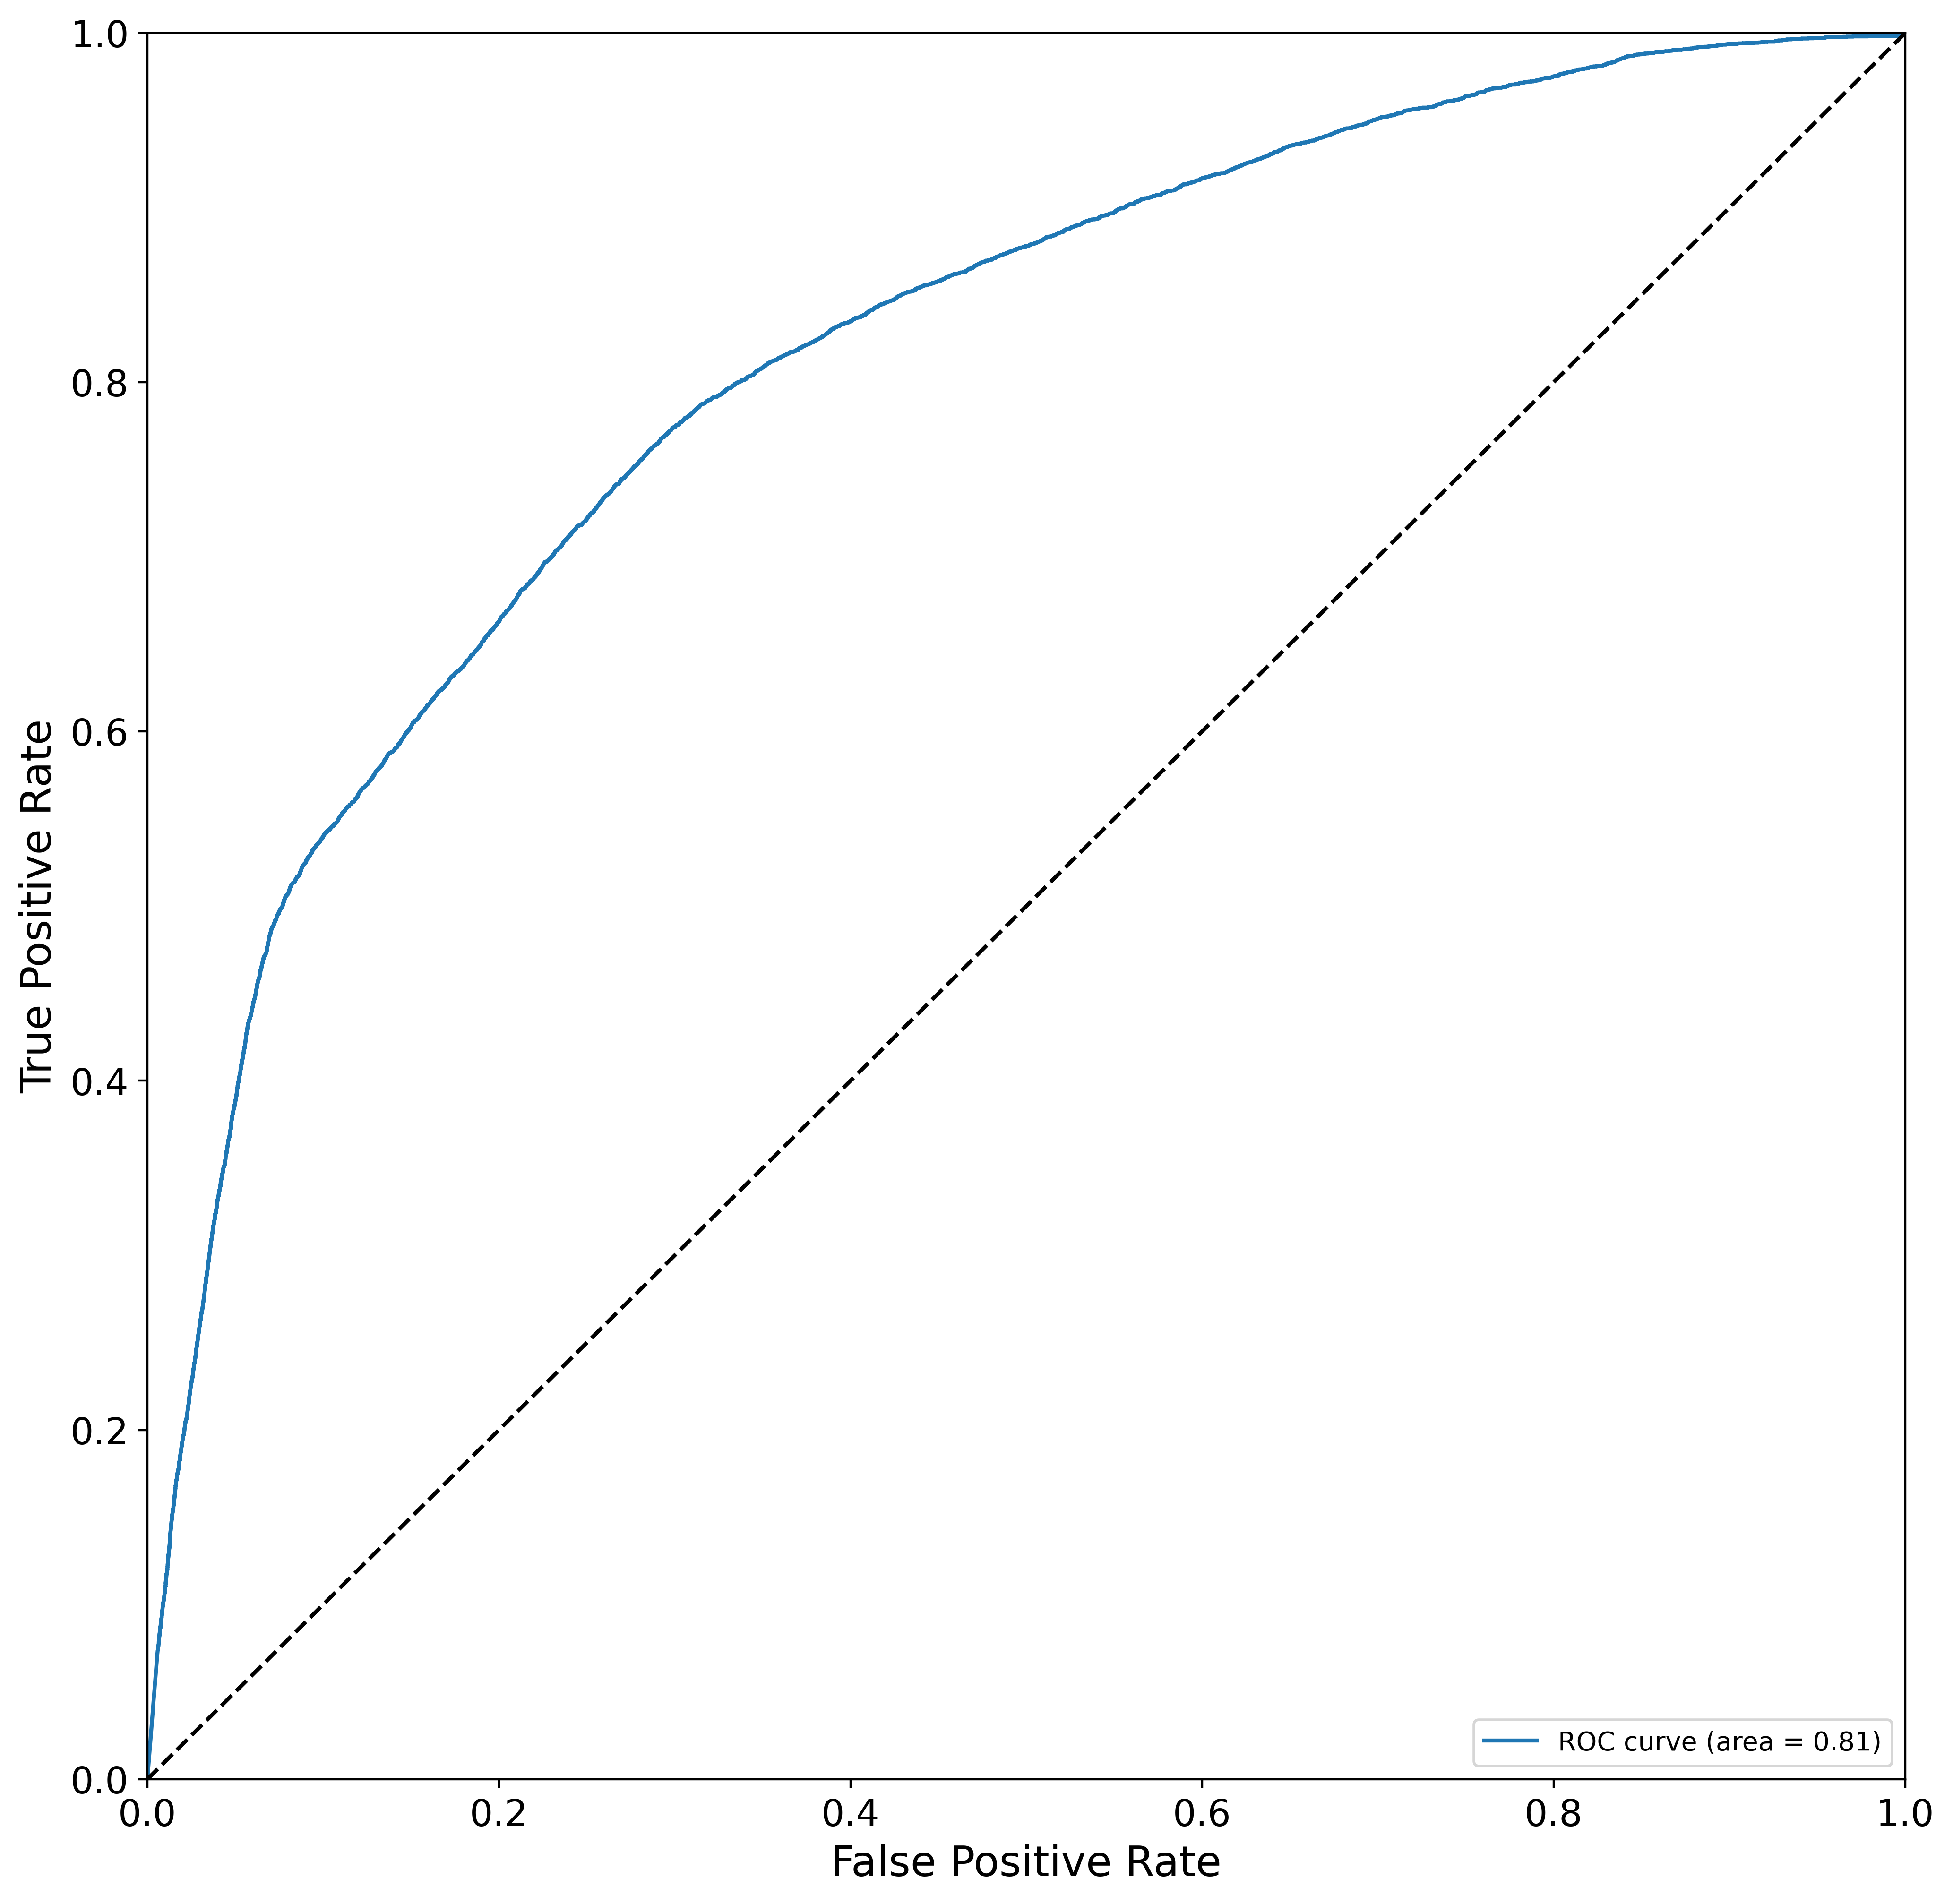

In [28]:
plt.figure(figsize=(12, 12), dpi=400)
plt.tick_params(axis='both', which='major', labelsize=14)

# Plot ROC curve for Naive Bayes model
fpr, tpr, _ = metrics.roc_curve(
    y_test_class, 
    class_models['naive_bayes']['probs']
)
plt.plot(
    fpr, tpr, 
    label='ROC curve (area = %0.2f)' % class_models['naive_bayes']['ROC_AUC_test']
)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line (random classifier)

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc="lower right")
plt.show()

# Studying Intrinsically interpretable (White-box) models

## Generalized Linear Models (GLMs)

In [29]:
# GLMs are a family of models unified by two key properties:
# 1. LINEAR PREDICTOR: ŷ = β₀ + β₁X₁ + β₂X₂ + ... (weighted sum of features)
# 2. LINK FUNCTION: Connects linear predictor to the distribution's mean
#
# Each GLM assumes a different statistical distribution for the target:
# - Linear Regression → Normal distribution
# - Logistic Regression → Bernoulli distribution  
# - Poisson Regression → Poisson distribution
# - Multinomial Regression → Multinomial distribution
#
# Common GLM variations:
# - Polynomial Regression: Linear regression with polynomial features (X²,X³,etc)
# - Ridge Regression: Linear regression with L2 regularization (penalty on coefficients)
# - Lasso Regression: Linear regression with L1 regularization
#
# The "linear" refers to the linear combination of coefficients and features,
# even though link functions can introduce non-linearity in the final prediction.
#
# Related concept - Generalized Additive Models (GAMs):
# - Similar to GLMs but replace linear combinations with arbitrary functions
# - Format: ŷ = f₁(X₁) + f₂(X₂) + ... (sum of functions, not weighted features)
# - More flexible but less common; covered later with EBM and GAMINet

### Linear Regression

In [30]:
# FORMULA:
# Simple (1 feature):     ŷ = β₀ + β₁X₁
# Multiple (n features):  ŷ = β₀ + β₁X₁ + β₂X₂ + ... + βₙXₙ
# Matrix form:            ŷ = βX
#
# where β₀ = intercept, β₁...βₙ = coefficients for each feature
# 
# COEFFICIENT ESTIMATION:
# - Uses OLS (Ordinary Least Squares)
# - Provides coefficients AND confidence intervals for statistical inference
#
# FIVE KEY ASSUMPTIONS (model validity depends on these):
#
# 1. LINEARITY: Relationship between X and y is linear
#    - Most fundamental assumption.
#
# 2. NORMALITY: Each feature follows a normal distribution
#    - Test: Q-Q plot, histogram, Kolmogorov-Smirnov test
#    - Fix: Non-linear transformations (log, sqrt, etc.)
#    - Impact: Invalid confidence intervals if violated
#
# 3. INDEPENDENCE: Observations are independent of each other
#    - Example violation: Multiple rows for the same flight
#    - Test: Check for duplicate identifiers (e.g., flight numbers)
#    - Impact: Affects result interpretation and statistical validity
#
# 4. NO MULTICOLLINEARITY: Features aren't highly correlated with each other
#    - Test: Correlation matrix, Tolerance, Variance Inflation Factor (VIF)
#    - Fix: Remove one feature from each highly correlated pair
#    - Impact: Inaccurate/unstable coefficients if violated
#
# 5. HOMOSCEDASTICITY: Residuals (errors) have constant variance
#    - Test: Goldfeld-Quandt test, residual plots
#    - Fix: Non-linear transformations or weighted least squares
#    - Note: Often violated in practice but model can still be useful
#
# INTERPRETATION FOCUS:
# - Non-linearity: Curved relationships between features and target
# - Non-monotonicity: Relationship changes direction (increases then decreases)
# - Interactivity: Feature effects depend on values of other features
#
# These characteristics are tested using linear regression methods but are
# relevant for ALL model types, not just linear models.

In [31]:
# Extract coefficients and intercept from linear regression model
coefs_lm = reg_models['linear']['fitted'].coef_
intercept_lm = reg_models['linear']['fitted'].intercept_

print('coefficients:\t%s' % coefs_lm)
print('intercept:\t%s' % intercept_lm)

coefficients:	[ 4.54984539e-03 -5.25067742e-03  8.94125541e-01 -1.52961053e-02
 -4.69623002e-01  1.25277815e-01 -6.46744472e-04 -1.26240049e-02
  4.50112895e+01  6.76385421e-04 -3.69920254e-04  5.47855860e-04
  3.73866548e-01 -9.06364154e-01 -6.74052666e-01 -9.17411191e-01
 -9.29843952e-01 -3.96621856e-02 -1.79666480e-02 -1.02912927e+00
 -3.94934854e-01]
intercept:	-37.861779327526364


In [ ]:
# Display equation format
print('ŷ = %0.2f + %0.4fX₁ + %0.4fX₂ + %0.3fX₃ + ...' % (
    intercept_lm, coefs_lm[0], coefs_lm[1], coefs_lm[2]
))

In [33]:
# Create DataFrame showing feature names and their coefficients
pd.DataFrame({
    'feature': X_train.columns.tolist(),
    'coef': coefs_lm.tolist()
})

,feature,coef
0,CRS_DEP_TIME,0.004550
1,DEP_TIME,-0.005251
2,DEP_DELAY,0.894126
3,DEP_AFPH,-0.015296
4,DEP_RFPH,-0.469623
5,TAXI_OUT,0.125278
6,WHEELS_OFF,-0.000647
7,CRS_ELAPSED_TIME,-0.012624
8,PCT_ELAPSED_TIME,45.011289
9,DISTANCE,0.000676


In [34]:
# 1. CONTINUOUS FEATURES (e.g., ARR_RFPH = 0.373844):
#    - Direct interpretation: For every 1-unit increase in relative flights 
#      per hour, carrier delay increases by 0.374 minutes (holding all else constant)
#    - "All else constant" = ceteris paribus assumption
#
# 2. BINARY FEATURES (e.g., ORIGIN_HUB = -1.029088):
#    - Interpretation: Being at a hub airport (vs. non-hub) reduces delay 
#      by ~1 minute (holding all else constant)
#    - Negative coefficient = reduces target value
#    - Positive coefficient = increases target value
#
# 3. CATEGORICAL FEATURES (not properly used in this dataset):
#    CURRENT APPROACH (Ordinal - PROBLEMATIC):
#    - DEP_MONTH (1-12) and DEP_DOW (0-6) treated as ordered integers
#    - Assumes linear relationship: Month 7 is "between" months 6 and 8
#    - Problem: July vs. October has no meaningful order for delays!
#    - This is NON-LINEAR behavior forced into a linear model
#    - Result: Tiny, hard-to-interpret coefficients (-0.040 for month, -0.018 for day)
#
#    BETTER APPROACH (One-Hot Encoding - RECOMMENDED):
#    - Create binary features: DEP_FRIDAY, DEP_SATURDAY, DEP_JULY, etc.
#    - Each gets its own coefficient showing specific effect
#    - Can answer: "Are Fridays worse than Wednesdays?" or "Is July worse than October?"
#    - Provides actionable insights for airline executives
#
# WHY THIS MATTERS:
# - Feature encoding choices directly impact interpretability
# - Wrong encoding can hide important patterns (e.g., Friday travel patterns)
# - Can also hurt model performance (though not critical in this case)
# - This example intentionally shows the consequence of improper feature treatment
#
# KEY LESSON: Always consider whether a numeric feature truly has 
# meaningful order or should be treated as categorical.

In [35]:
# MATHEMATICAL MEANING:
# Intercept = predicted value when ALL features equal 0
# In this model: β₀ = -37.86 minutes
#
# PRACTICAL INTERPRETATION PROBLEM:
# - A flight with DISTANCE = 0, DEP_DELAY = 0, etc. is impossible!
# - Most features cannot plausibly be 0 simultaneously in real scenarios
# - Therefore, the intercept often has no meaningful real-world interpretation
# - It's mathematically necessary but practically uninterpretable
#
# SOLUTION: STANDARDIZE FEATURES (mean = 0, std = 1)
# If you apply StandardScaler to features:
# - Each feature is transformed: X_scaled = (X - mean) / std
# - Now X = 0 means "average value" not "zero value"
# - Intercept becomes: "Predicted delay for an average flight"
# - This gives the intercept actual business meaning!
#
# Example with standardization:
# - If intercept = 5.2 after standardization
# - Interpretation: "An average flight (all features at their mean) 
#   is predicted to have 5.2 minutes of carrier delay"
#
# KEY TAKEAWAY:
# - Raw intercept is rarely interpretable with unstandardized features
# - Standardization makes intercept meaningful = baseline prediction
# - Same principle applies to models like height prediction (height ≠ 0 impossible)

In [36]:
# Use statsmodels for detailed statistical analysis (p-values, confidence intervals)
linreg_mdl = sm.OLS(y_train_reg, sm.add_constant(X_train))
linreg_mdl = linreg_mdl.fit()
print(linreg_mdl.summary())

                            OLS Regression Results                            
Dep. Variable:          CARRIER_DELAY   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                 4.251e+05
Date:                Wed, 15 Oct 2025   Prob (F-statistic):               0.00
Time:                        01:00:11   Log-Likelihood:            -2.6574e+06
No. Observations:              764597   AIC:                         5.315e+06
Df Residuals:                  764575   BIC:                         5.315e+06
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -37.8618    

In [37]:
# Extract summary and identify most significant features by t-statistic
summary_df = linreg_mdl.summary2().tables[1]
summary_df = summary_df.drop(['const']).reset_index().rename(
    columns={'index': 'feature'}
)
summary_df['t_abs'] = abs(summary_df['t'])  # Absolute t-value

# Sort by absolute t-statistic to see most important features
summary_df.sort_values(by='t_abs', ascending=False).style.format(
    dict(zip(summary_df.columns[1:], ['{:.4f}'] * 7))
).background_gradient(
    cmap='plasma_r', low=0, high=0.1, subset=['P>|t|', 't_abs']
)

# DEP_DELAY has highest t-statistic (2951), indicating strong significance

,feature,Coef.,Std.Err.,t,P>|t|,[0.025,0.975],t_abs
2,DEP_DELAY,0.8941,0.0003,2951.0560,0.0000,0.8935,0.8947,2951.0560
16,LATE_AIRCRAFT_DELAY,-0.9298,0.0005,-1827.0181,0.0000,-0.9308,-0.9288,1827.0181
13,WEATHER_DELAY,-0.9064,0.0009,-995.3664,0.0000,-0.9081,-0.9046,995.3664
14,NAS_DELAY,-0.6741,0.0008,-829.1287,0.0000,-0.6756,-0.6725,829.1287
8,PCT_ELAPSED_TIME,45.0113,0.1172,384.0726,0.0000,44.7816,45.2410,384.0726
15,SECURITY_DELAY,-0.9174,0.0055,-167.8571,0.0000,-0.9281,-0.9067,167.8571
5,TAXI_OUT,0.1253,0.0012,104.1196,0.0000,0.1229,0.1276,104.1196
0,CRS_DEP_TIME,0.0045,0.0001,62.8717,0.0000,0.0044,0.0047,62.8717
1,DEP_TIME,-0.0053,0.0001,-57.1159,0.0000,-0.0054,-0.0051,57.1159
3,DEP_AFPH,-0.0153,0.0003,-47.7245,0.0000,-0.0159,-0.0147,47.7245


### Ridge Regression

In [38]:
# WHAT IS RIDGE REGRESSION?
# - Part of the "penalized/regularized regression" family (Ridge, LASSO, ElasticNet)
# - Also called "sparse linear models"
# - Uses L2 regularization: adds penalty term (α * Σβ²) to loss function
# - Forces coefficients toward zero, reducing model complexity
#
# WHY USE REGULARIZATION?
# Purpose: Reduce noise by making irrelevant features less influential
#
# THE "BET ON SPARSITY" PRINCIPLE:
# - Research shows: typically only a small subset of features have substantial effects
# - Many features contribute little or add noise (see t_abs values - most are similar yellow)
# - Bottom 10 features may be nearly irrelevant or cause confounding
# - Ridge regression automatically identifies and downweights these features
#
# KEY BENEFITS:
# 1. Lower variance → Better generalization to new data
# 2. Handles multicollinearity (correlated features get similar, smaller coefficients)
# 3. Works well with wide data (many features, fewer observations)
# 4. Prevents overfitting by constraining coefficient magnitudes
#
# WHEN TO USE RIDGE:
# - Dataset has many features (high dimensionality)
# - Features exhibit multicollinearity (high correlation matrix values)
# - Overfitting is a concern (large gap between train and test performance)
# - Feature selection: Identify which features matter most
#
# INTERPRETATION:
# - Coefficients closer to 0 → Less important features
# - Compare to unregularized linear regression to see what was shrunk
# - Regularization strength (alpha) controls how much shrinkage occurs
#
# RIDGE CLASSIFICATION (RidgeClassifierCV):
# - Adapts ridge regression for classification problems
# - Training: Converts labels to -1/+1 scale
# - Fits regularized linear regression
# - Prediction: Converts back to 0/1 scale
# - Interpreted same way as ridge regression coefficients
#
# SPARSITY = "LESS IS MORE":
# Reduced complexity → Lower variance → Better predictions on unseen data

In [39]:
# Compare linear regression and ridge regression coefficients
# Handle both Pipeline and non-Pipeline Ridge models
if hasattr(reg_models['ridge']['fitted'], 'coef_'):
    # Direct Ridge model
    coefs_ridge = reg_models['ridge']['fitted'].coef_
else:
    # Ridge inside a Pipeline (if StandardScaler was added)
    coefs_ridge = reg_models['ridge']['fitted'].named_steps['ridgecv'].coef_

coef_ridge_df = pd.DataFrame({
    'feature': X_train.columns.values.tolist(),
    'coef_linear': coefs_lm,
    'coef_ridge': coefs_ridge
})

# Calculate how much each coefficient was shrunk by regularization
coef_ridge_df['coef_regularization'] = (
    coef_ridge_df['coef_linear'] - coef_ridge_df['coef_ridge']
)
coef_ridge_df.style.background_gradient(cmap='plasma_r', low=0, high=0.1, subset=['coef_regularization'])

,feature,coef_linear,coef_ridge,coef_regularization
0,CRS_DEP_TIME,0.004550,0.004550,-0.000000
1,DEP_TIME,-0.005251,-0.005251,0.000000
2,DEP_DELAY,0.894126,0.894126,0.000000
3,DEP_AFPH,-0.015296,-0.015296,-0.000000
4,DEP_RFPH,-0.469623,-0.469623,0.000000
5,TAXI_OUT,0.125278,0.125278,-0.000000
6,WHEELS_OFF,-0.000647,-0.000647,-0.000000
7,CRS_ELAPSED_TIME,-0.012624,-0.012624,0.000000
8,PCT_ELAPSED_TIME,45.011289,45.011289,0.000000
9,DISTANCE,0.000676,0.000676,-0.000000


In [70]:
# Show how coefficients change as regularization strength increases
num_alphas = 150
alphas = np.logspace(-4, 13, num_alphas)  # Log-spaced alpha values
alphas_coefs = []

for alpha in alphas:
    ridge = linear_model.Ridge(alpha=alpha).fit(X_train, y_train_reg)
    # Exclude DISTANCE column for cleaner visualization
    alphas_coefs.append(np.concatenate((ridge.coef_[:8], ridge.coef_[9:])))

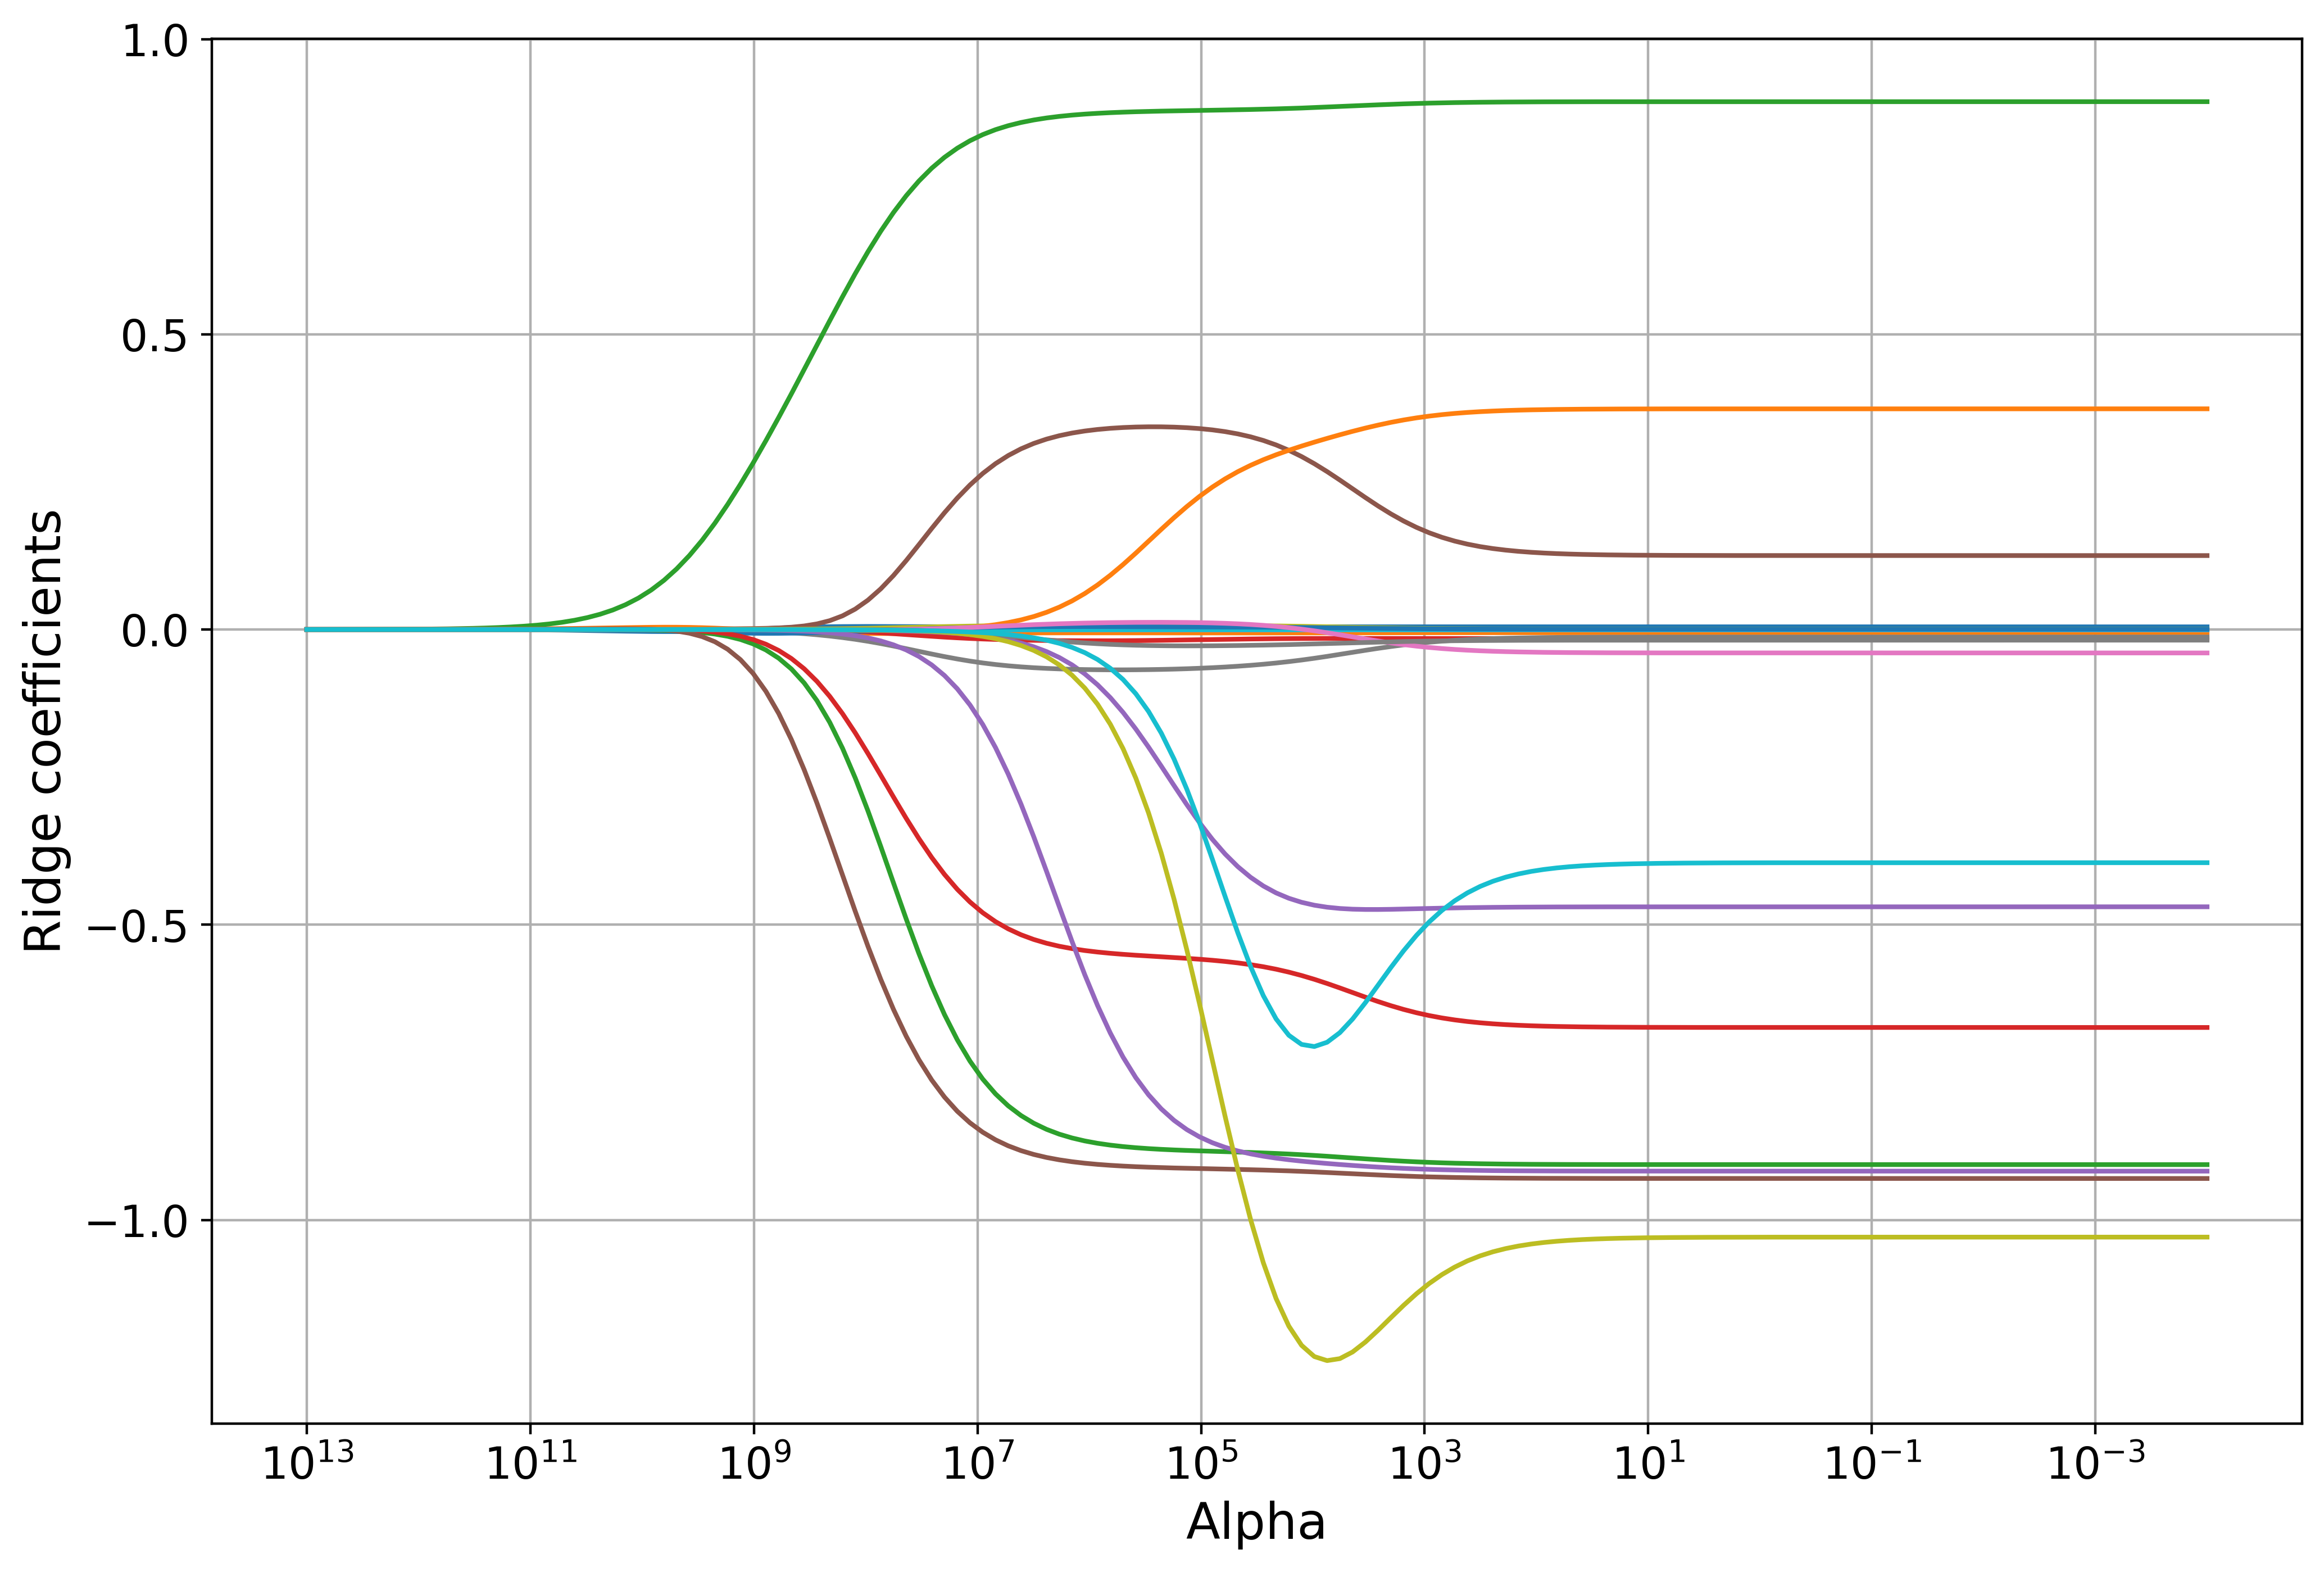

In [71]:
plt.figure(figsize=(12, 8), dpi=400)
plt.gca().invert_xaxis()  # Higher alpha (more regularization) on left
plt.tick_params(axis='both', which='major', labelsize=14)
plt.plot(alphas, alphas_coefs)
plt.xscale("log")
plt.xlabel('Alpha', fontsize=16)
plt.ylabel('Ridge coefficients', fontsize=16)
plt.grid()
plt.show()

# As alpha increases, coefficients shrink toward zero

In [72]:
# Feature importance
# This is precisely the same as with linear regression, but again we need the standard error of the co
# efficients, which is something that cannot be extracted from the scikit-learn model. You can use the 
# statsmodels fit_regularized method to this effect.

### Polynomial Regression

In [42]:
# Display number of features created by polynomial transformations
print(len(reg_models['linear_poly']['fitted'].get_params()['linearregression'].coef_))
# Output: 253 features (from 21 original features with degree=2)

253


In [43]:
print(len(reg_models['linear_interact']['fitted'].get_params()['linearregression'].coef_))
# Output: 232 features (interaction-only)

232


In [73]:
# WHAT IS POLYNOMIAL REGRESSION?
# - Special case of linear regression with expanded features
# - Creates higher-degree terms (X², X³) and interactions (X₁*X₂)
# - Still uses linear regression math, just with more features
#
# EXAMPLE TRANSFORMATION (degree=2):
# Original (2 features):
#   ŷ = β₀ + β₁X₁ + β₂X₂
#
# After polynomial expansion:
#   ŷ = β₀ + β₁X₁ + β₂X₂ + β₃X₁² + β₄X₁X₂ + β₅X₂²
#   
# Components:
#   - β₁X₁, β₂X₂           → Original features (linear terms)
#   - β₃X₁², β₅X₂²         → Squared terms (capture curvature)
#   - β₄X₁X₂               → Interaction terms (feature dependencies)
#
# FEATURE EXPLOSION:
# In this example: 21 original features → 253 polynomial features
# - Most generated features are interaction terms between all features
# - interaction_only=True: 21 features → 232 features (no squared terms)
# - Can check with: model.coef_.shape[0]
#
# INTERPRETABILITY TRADE-OFFS:
# 
# LOST:
# - Global holistic interpretation (can't understand 253-term formula)
# - Simple, intuitive model explanation
# - Easy coefficient comparison
#
# RETAINED:
# - Local interpretation (can explain individual predictions)
# - Modular interpretation (separate feature effects due to additivity)
# - All statistical methods from linear regression:
#   * t-statistics and p-values
#   * Confidence intervals
#   * R-squared and adjusted R-squared
#   * Goodness of fit tests
#   * Residual analysis
#   * Analysis of variance (ANOVA)
#   * Linear correlation metrics
#
# PRACTICAL INTERPRETATION APPROACH:
# 1. Use statsmodels to rank all 253 coefficients by importance (t-statistic)
# 2. Challenge: Match generated feature names to original features
#    - PolynomialFeatures creates features in specific order
#    - Need to map back: "feature_5" → "DEP_DELAY²" or "DEP_DELAY * DISTANCE"
# 3. Identify important higher-order terms:
#    - Significant X² terms → Non-linear relationships
#    - Significant X₁*X₂ terms → Feature interactions/dependencies
#
# EXAMPLE INSIGHTS:
# - If DEP_DELAY² has high t-statistic → Delay impact accelerates non-linearly
# - If DEP_DELAY*DISTANCE has high coefficient → Delay effect varies by distance
#
# WHEN TO USE:
# - Suspect non-linear relationships between features and target
# - Want to capture feature interactions automatically
# - Have enough data to support many features (avoid overfitting)
# - Willing to sacrifice global simplicity for local accuracy
#
# KEY INSIGHT:
# Polynomial regression reveals whether features have:
# - Non-linear nature (via squared/cubic terms)
# - Dependency on other features (via interaction terms)
# This is critical for understanding model behavior beyond simple linearity.

### Logistic Regression

In [75]:
# MATHEMATICAL FOUNDATION:
# Like linear regression, logistic regression has coefficients and intercept:
#   coef_ = [β₁, β₂, ..., βₙ]
#   intercept_ = β₀
#
# But the prediction formula is different (logistic/sigmoid function):
#
#   P(y=1|X) = e^(β₀ + β₁X₁ + β₂X₂ + ... + βₙXₙ)
#              ────────────────────────────────────
#              1 + e^(β₀ + β₁X₁ + β₂X₂ + ... + βₙXₙ)
#
# Where:
#   - P(y=1|X) = Probability that observation belongs to positive class
#   - e = Euler's number (2.718...)
#   - Numerator and denominator contain same exponential of linear predictor
#   - Output is always between 0 and 1 (valid probability)
#
# WHY COEFFICIENTS ARE "LOG ODDS":
# - To isolate β coefficients, apply logarithm to both sides
# - Therefore, coefficients represent change in log odds, not probabilities
# - Must apply exponential (e^β) to interpret as odds ratios
#
# INTERPRETING COEFFICIENTS:
# For each 1-unit increase in feature X_i (holding all else constant):
#   - Odds of positive class multiply by e^βᵢ
#   - If β = 0.5  → e^0.5 = 1.65  → 65% increase in odds
#   - If β = -0.5 → e^-0.5 = 0.61 → 39% decrease in odds
#   - If β = 0    → e^0 = 1       → No change in odds
#
# Same feature type interpretations as linear regression apply:
#   - Continuous: Change per unit increase
#   - Binary: Difference between 0 and 1
#   - Categorical: Should use one-hot encoding (same issue as linear regression)
#
# FEATURE IMPORTANCE PROBLEM:
# No statistical consensus on best method! Multiple approaches exist:
#   1. Standardize features first (most popular, but hurts coefficient interpretation)
#   2. Pseudo-R² methods
#   3. One-feature-at-a-time ROC AUC
#   4. Partial chi-squared statistic
#   5. Coefficient × Standard Deviation (used here - crude but effective)
#
# METHOD USED HERE: Coefficient × Standard Deviation
#   stdv = np.std(X_train, 0)
#   importance = abs(coefs_log * stdv)
#
# Why this works:
#   - Accounts for different feature scales
#   - Features with large variance get appropriate weight
#   - Simple and reasonably accurate approximation
#
# RESULTS INTERPRETATION:
# Top features by importance:
#   - DEP_DELAY : Departure delay is strongest predictor
#   - CRS_ELAPSED_TIME : Scheduled flight duration matters
#   - DISTANCE : Flight distance is important
#   - LATE_AIRCRAFT_DELAY : Previous aircraft delays propagate
#   - 5 delay-related features in top 8: Pattern worth investigating!
#
# KEY INSIGHT:
# Feature importance consistency across models (linear vs logistic regression)
# suggests robust relationships - delay features dominate in both cases.
#
# STANDARDIZATION TRADE-OFF:
# We avoided StandardScaler before training because:
#   ✓ Keeps coefficient interpretation straightforward
#   ✓ Can directly see impact of 1-minute delay, 1-mile distance, etc.
#   ✗ Makes feature importance calculation less reliable
#   ✗ Loses some numerical stability benefits
#
# WHY LOGISTIC REGRESSION IS INTERPRETABLE:
# 1. Coefficients have clear mathematical meaning (log odds)
# 2. Can compute exact contribution of each feature
# 3. Additive structure: feature effects can be separated
# 4. Statistical theory provides confidence intervals, p-values
# 5. Global and local interpretation both possible
# 6. Well-studied for decades with proven methods
#
# LIMITATION:
# Feature importance remains challenging even for interpretable models!

In [76]:
# Extract logistic regression coefficients
coefs_log = class_models['logistic']['fitted'].coef_
intercept_log = class_models['logistic']['fitted'].intercept_

print('coefficients:\t%s' % coefs_log)
print('intercept:\t%s' % intercept_log)

coefficients:	[[-1.12406274e-03  3.45328478e-04  1.55767506e-01  3.76542681e-03
  -2.13310521e-03 -3.88211114e-03  9.37762161e-05 -5.05496713e-02
  -1.72998357e-03  5.34936852e-03 -3.35882874e-04 -6.00538830e-03
  -2.71180005e-03 -1.53357547e-01 -1.21299433e-01 -5.96808489e-03
  -1.61692830e-01 -1.29025985e-02 -5.24302924e-03  4.86814914e-04
  -2.04834171e-03]]
intercept:	[-0.00227334]


In [77]:
# Standardize coefficients by feature standard deviation
# This accounts for different feature scales
stdv = np.std(X_train, 0)
abs(coefs_log.reshape(21,) * stdv).sort_values(ascending=False)

# DEP_DELAY has largest standardized coefficient (6.89), 
# indicating it's the most important predictor

DEP_DELAY              6.894956
CRS_ELAPSED_TIME       4.012421
LATE_AIRCRAFT_DELAY    3.995700
DISTANCE               3.474025
NAS_DELAY              1.671511
WEATHER_DELAY          1.602547
CRS_DEP_TIME           0.563613
ARR_AFPH               0.212370
DEP_TIME               0.177812
CRS_ARR_TIME           0.177391
DEP_AFPH               0.133503
WHEELS_OFF             0.048444
DEP_MONTH              0.044033
TAXI_OUT               0.038313
DEP_DOW                0.010478
SECURITY_DELAY         0.009782
ARR_RFPH               0.001956
DEP_RFPH               0.001205
DEST_HUB               0.000996
ORIGIN_HUB             0.000237
PCT_ELAPSED_TIME       0.000182
dtype: float64

### Decision Trees

In [79]:
# HISTORY & INTUITION:
# - Used for centuries before computerization (flowchart-like reasoning)
# - Requires minimal mathematical knowledge to understand
# - Mimics human decision-making: "If X, then Y, else Z"
# - Low barrier to comprehension = extremely interpretable (when simple)
#
# INTERPRETABILITY SPECTRUM:
#
# HIGHLY INTERPRETABLE:
# - Shallow trees (depth ≤ 5): Can visualize and understand entire structure
# - Clear IF-THEN-ELSE rules that humans can follow
# - Each split asks simple question: "Is feature X > threshold?"
#
# LESS INTERPRETABLE:
# - Deep trees (depth > 10): Too many branches to comprehend
# - Ensemble methods that combine multiple trees:
#   * Random Forest: Averages 100+ trees (bagging)
#   * Gradient Boosting: Sequential trees correcting errors (boosting)
#   * Stacking: Multiple tree models combined
# - Trees using dimensionality reduction (PCA) on features first
# - Trees with embeddings (neural network features)
#
# PRACTICAL REALITY:
# Most production decision trees are complex and not fully interpretable as
# a whole, BUT they can still provide valuable insights:
# - Feature importance rankings
# - Key decision thresholds
# - Sample decision paths
# - Rules extracted from branches
#
# VERSATILITY:
# - Classification: Predict categories (delayed/not delayed)
# - Regression: Predict continuous values (minutes of delay)
# - Can handle both numeric and categorical features naturally
# - No assumptions about data distributions (non-parametric)
#
# KEY TAKEAWAY:
# Even when overall tree structure is too complex to fully interpret,
# decision trees can be "mined" for insights about:
# - Which features matter most
# - At what thresholds decisions change
# - How predictions are made for specific instances

#### CART Decision Trees

In [81]:
# WHAT IS CART?
# - "Vanilla" or standard decision tree algorithm
# - Most commonly used decision tree implementation
# - Truly white-box: can be expressed as formula, visualized, and printed as rules
#
# MATHEMATICAL FORMULA:
#
#   ŷ = Σ μₘ · I(x ∈ Rₘ)  [sum from m=1 to M]
#
# Where:
#   - M = total number of leaf nodes (terminal regions)
#   - Rₘ = subset of feature space for leaf node m
#   - I(x ∈ Rₘ) = Identity function (returns 1 if x is in region Rₘ, else 0)
#   - μₘ = average of all target values in region Rₘ
#
# HOW IT WORKS:
# 1. Identity function I checks which leaf node (region) observation x falls into
# 2. Only ONE region will match (I returns 1), all others return 0
# 3. Prediction = average of training samples in that matching region
#
# EXAMPLE:
# If observation xᵢ falls into leaf node k (region Rₖ):
#   ŷᵢ = μₖ = mean of all training targets in Rₖ
#
# TASK-SPECIFIC BEHAVIOR:
#
# REGRESSION:
#   - Prediction = μₘ (average of target values in leaf)
#   - Example: Leaf contains flights with delays [5, 7, 8, 6] → predict 6.5 min
#
# CLASSIFICATION:
#   - No μₘ multiplication needed
#   - Prediction = majority class in leaf
#   - Example: Leaf has 80% "delayed" → predict "delayed"
#   - Can also output probabilities: 80% delayed, 20% on-time
#
# HOW SPLITS ARE CHOSEN (CREATING Rₘ REGIONS):
# CART uses the GINI INDEX to recursively partition data:
#   - Gini measures impurity/heterogeneity in a node
#   - Algorithm searches for split that maximizes difference between branches
#   - Goal: Make left and right branches as "pure" as possible
#   - Pure = all samples in node have same target value
#
# Split selection process:
#   1. For each feature, try all possible threshold values
#   2. Calculate Gini impurity reduction for each split
#   3. Choose split with largest impurity reduction
#   4. Repeat recursively until stopping criteria met
#
# STOPPING CRITERIA:
#   - Maximum depth reached (e.g., max_depth=7 in our model)
#   - Minimum samples per leaf (e.g., min_samples_leaf=5)
#   - No further impurity reduction possible (pure node)
#   - Minimum samples to split (e.g., min_samples_split=10)
#
# THREE INTERPRETABLE REPRESENTATIONS:
#
# 1. MATHEMATICAL FORMULA (shown above):
#    - Exact equation for predictions
#    - Shows additive structure
#
# 2. VISUAL TREE DIAGRAM:
#    - See decision nodes (splits) and leaf nodes (predictions)
#    - Follow path from root to leaf for any prediction
#    - Color-coded by class or value
#
# 3. TEXT RULES (IF-THEN statements):
#    - Human-readable decision rules
#    - Example: "IF DEP_DELAY ≤ 20.5 AND PCT_ELAPSED_TIME ≤ 0.99 THEN delay=0"
#    - Can extract and use rules independently
#
# WHY IT'S WHITE-BOX:
# - Complete transparency: every decision is visible
# - Can trace exact path for any prediction
# - Rules are simple binary questions
# - No hidden computations or black-box operations
#
# INTERPRETABILITY IN PRACTICE:
# - Shallow trees (depth ≤ 5): Fully interpretable by humans
# - Deep trees (depth > 10): Formula exists but too complex to grasp holistically
# - Even deep trees provide: feature importance, key splits, sample paths

C:\Users\ASUS\AppData\Local\Temp\ipykernel_68308\1295006701.py:9: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



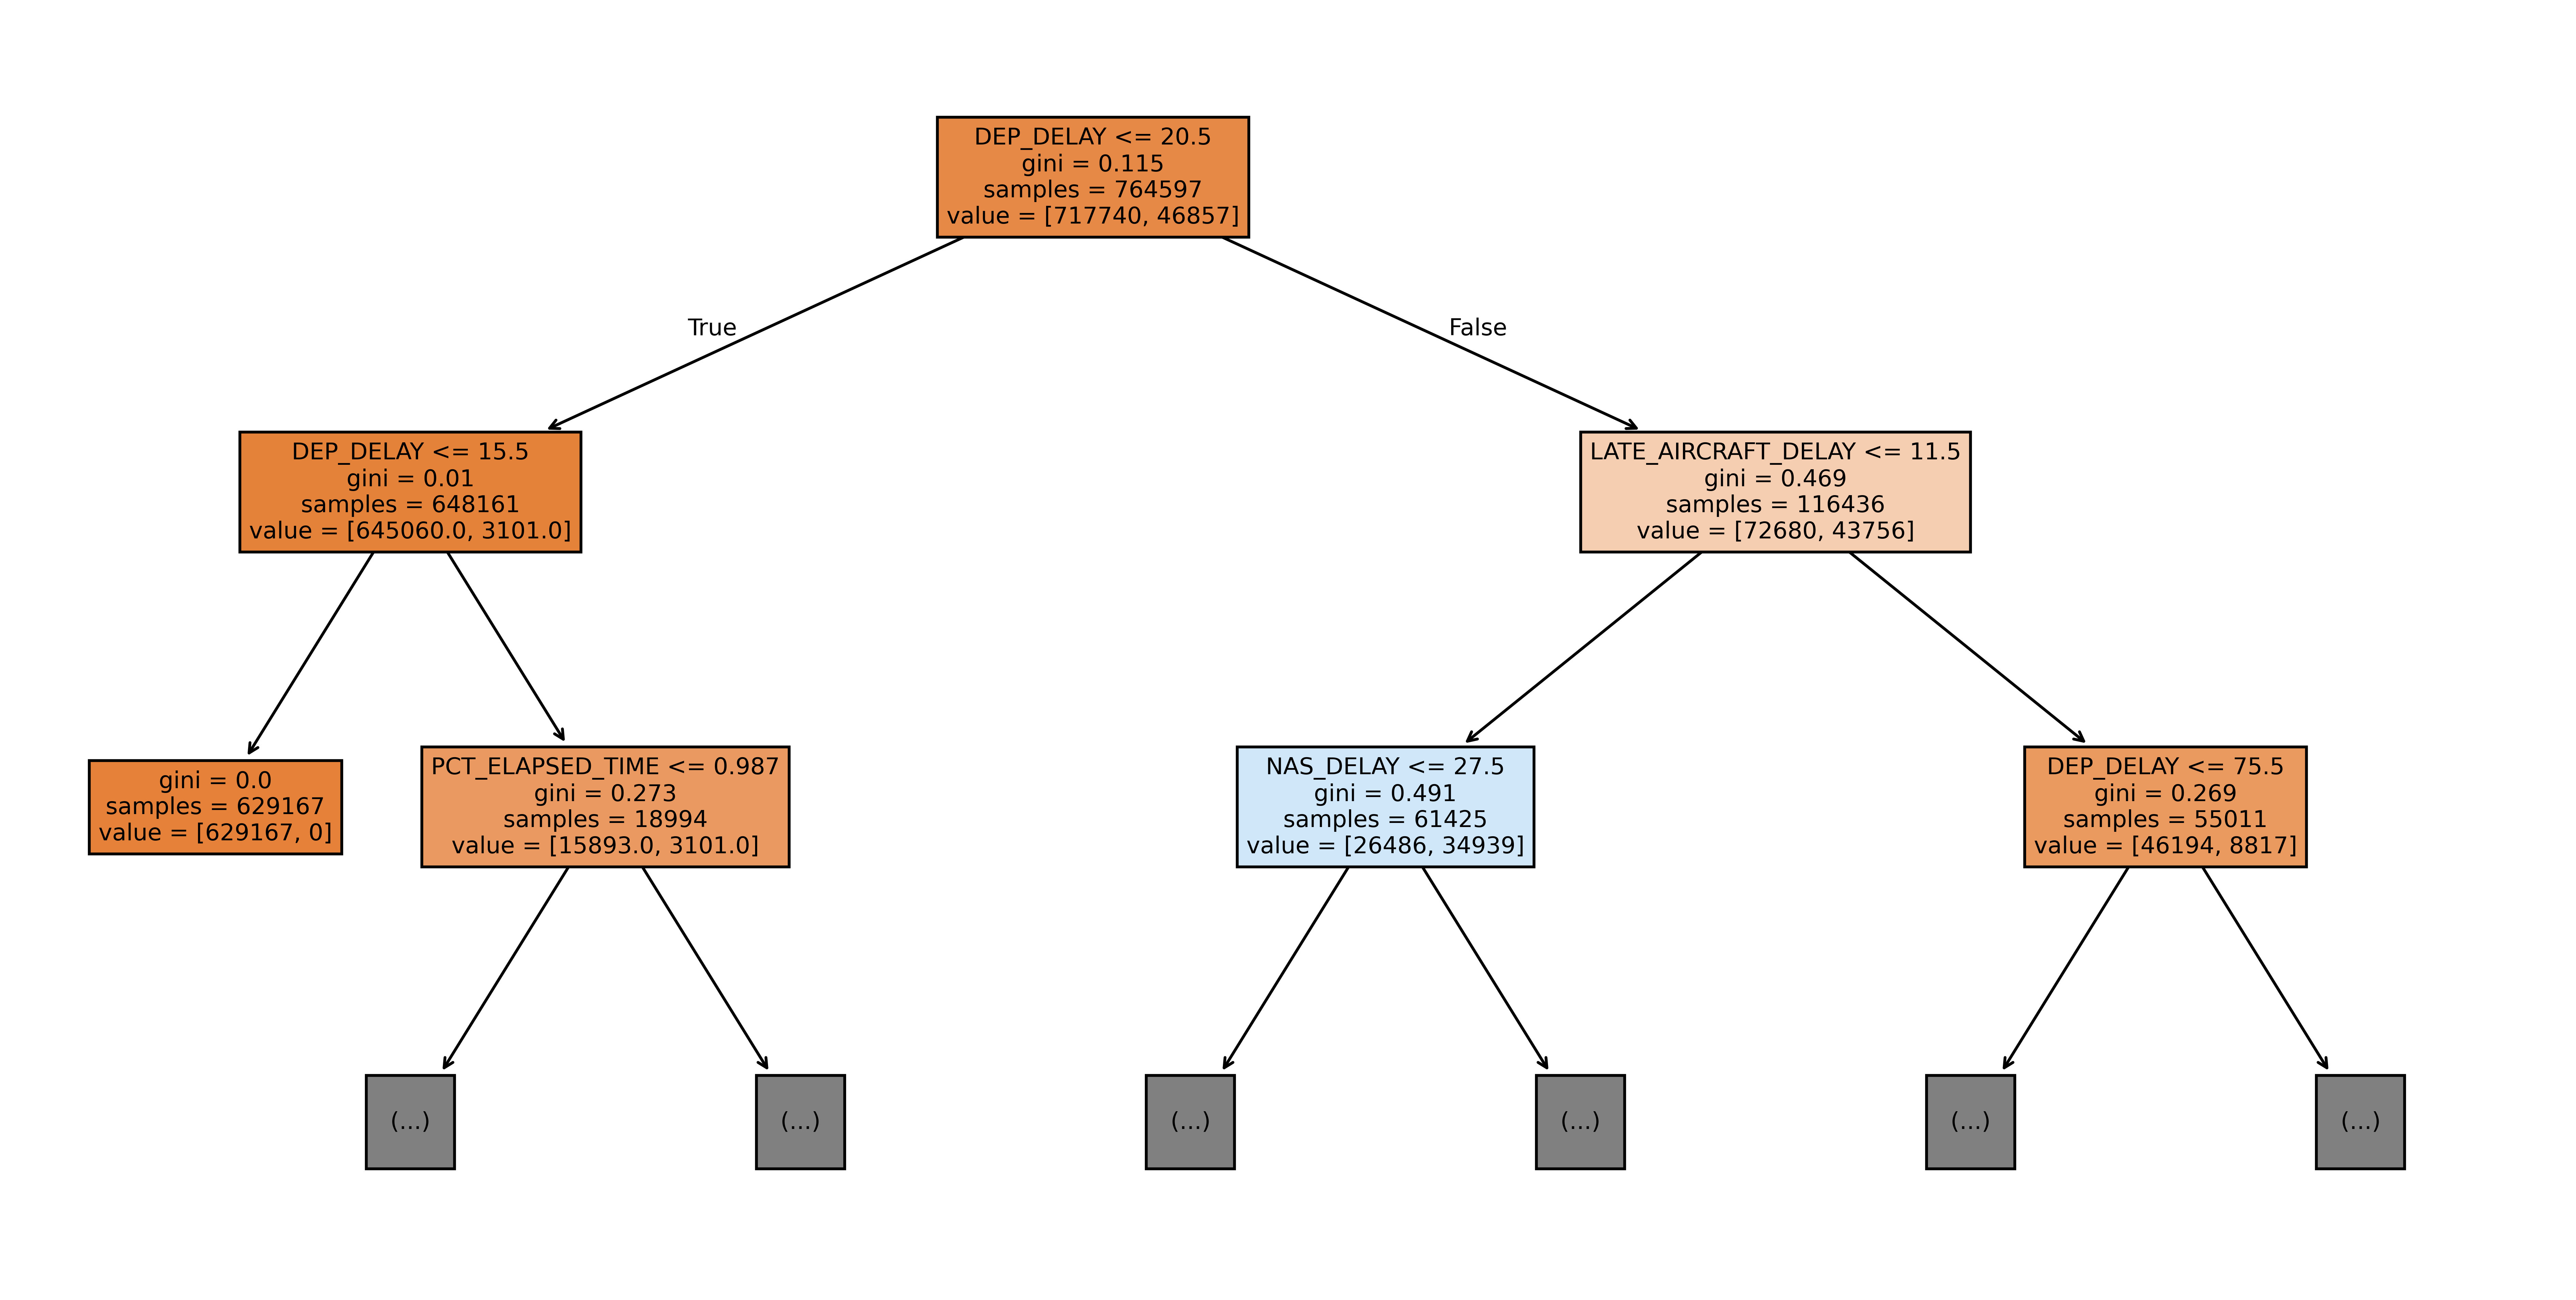

In [78]:
# Visualize the decision tree structure
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16, 8), dpi=600)
tree.plot_tree(
    class_models['decision_tree']['fitted'],
    feature_names=X_train.columns.values.tolist(),
    filled=True,
    max_depth=2 # Limit depth for readability
)
fig.show()

In [47]:
# Export tree as text for detailed inspection
text_tree = tree.export_text(
    class_models['decision_tree']['fitted'],
    feature_names=X_train.columns.values.tolist()
)
print(text_tree)

|--- DEP_DELAY <= 20.50
|   |--- DEP_DELAY <= 15.50
|   |   |--- class: 0
|   |--- DEP_DELAY >  15.50
|   |   |--- PCT_ELAPSED_TIME <= 0.99
|   |   |   |--- PCT_ELAPSED_TIME <= 0.98
|   |   |   |   |--- PCT_ELAPSED_TIME <= 0.96
|   |   |   |   |   |--- CRS_ELAPSED_TIME <= 65.50
|   |   |   |   |   |   |--- PCT_ELAPSED_TIME <= 0.94
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- PCT_ELAPSED_TIME >  0.94
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- CRS_ELAPSED_TIME >  65.50
|   |   |   |   |   |   |--- PCT_ELAPSED_TIME <= 0.95
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- PCT_ELAPSED_TIME >  0.95
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- PCT_ELAPSED_TIME >  0.96
|   |   |   |   |   |--- CRS_ELAPSED_TIME <= 140.50
|   |   |   |   |   |   |--- DEP_DELAY <= 18.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- DEP_DELAY >  18.50
|   |   |   |   |   |   |   |--- class: 0
|   |   

In [48]:
# Calculate feature importance based on how much each feature
# reduces impurity (Gini) across all splits
dt_imp_df = pd.DataFrame({
    'feature': X_train.columns.values.tolist(),
    'importance': class_models['decision_tree']['fitted'].feature_importances_
}).sort_values(by='importance', ascending=False)

In [49]:
dt_imp_df
# DEP_DELAY is most important (0.53), followed by LATE_AIRCRAFT_DELAY (0.20)

,feature,importance
2,DEP_DELAY,0.527482
16,LATE_AIRCRAFT_DELAY,0.199153
8,PCT_ELAPSED_TIME,0.105381
13,WEATHER_DELAY,0.101649
14,NAS_DELAY,0.062732
15,SECURITY_DELAY,0.001998
9,DISTANCE,0.001019
7,CRS_ELAPSED_TIME,0.000281
5,TAXI_OUT,0.000239
6,WHEELS_OFF,0.000035


In [83]:
# DEPENDENT VS INDEPENDENT VARIABLES:
# - CARRIER_DELAY (target) = Dependent variable
#   * Depends on/affected by other features
# - All other features = Independent variables
#   * Should influence/predict the dependent variable
#
# CRITICAL PRINCIPLE:
# Statistical relationship ≠ Causation
# BUT feature selection should be informed by plausible causal relationships
#
# PLAUSIBLE PREDICTORS (Make Sense):
# ✓ DEP_DELAY → CARRIER_DELAY
#   - Departure delay logically causes arrival delay
#   - Known before/during flight
#   - Clear causal pathway
#
# ✓ LATE_AIRCRAFT_DELAY → CARRIER_DELAY  
#   - Previous aircraft's delay known before current flight departs
#   - Risk factor, not caused BY current flight
#   - Timeline makes sense for prediction
#
# QUESTIONABLE PREDICTORS (DATA LEAKAGE RISK):
# ⚠ WEATHER_DELAY → CARRIER_DELAY?
#   - When is weather delay determined? Before departure or after landing?
#   - If weather hasn't happened yet mid-flight, we can't use it for prediction
#   - Could be causing data leakage (using future information)
#
# ⚠ SECURITY_DELAY → CARRIER_DELAY?
#   - When is security breach recorded? Real-time or post-flight?
#   - If not yet occurred, can't be used for prediction
#   - May leak information from the future
#
# ⚠ NAS_DELAY, others → similar timing concerns
#
# DATA LEAKAGE PROBLEM:
# Definition: Using information in training that wouldn't be available at 
# prediction time in production
#
# Why these features might cause leakage:
# - Bureau of Transportation Statistics defines delays as "discrete categories"
# - BUT categories may be assigned AFTER flight lands
# - If delays are determined post-hoc, they reveal the answer we're trying to predict
# - Model learns patterns that won't exist in real-world deployment
#
# SOLUTION - CONSULT DOMAIN EXPERTS:
# Questions to ask airline executives:
# 1. WHEN is each delay category officially determined?
# 2. Is delay category known: before departure, mid-flight, or only after landing?
# 3. Is this information accessible from cockpit/command center in real-time?
# 4. What is the timeline/process for categorizing delays?
#
# If delays are post-flight only → REMOVE from model
# Alternative features (no leakage):
# - First 30 minutes of flight logs (real-time data)
# - Historical weather patterns (forecasted, not actual)
# - Airport congestion metrics (real-time)
# - Aircraft maintenance history (known pre-flight)
#
# LESSON 1: DOMAIN EXPERTS CAN MISLEAD
# Airline executives suggested these features would be important:
# - DEP_DOW (day of week): Minimal impact (~0.007 correlation)
# - ORIGIN_HUB, DEST_HUB: Low importance (~0.015 correlation)
# - Congestion metrics: Little effect
#
# What went wrong:
# - Intuition said "Fridays are busier" → delays should increase
# - Reality: No strong statistical relationship in data
# - Should have checked correlation BEFORE feature engineering
#
# LESSON 2: VALIDATE WITH WHITE-BOX MODELS
# Using interpretable models (linear regression, decision trees) helps:
# ✓ Assess which engineered features actually matter
# ✓ Identify wasted effort on irrelevant features
# ✓ Challenge domain expert assumptions with data
# ✓ Understand WHY certain features don't work
#
# PRACTICAL WORKFLOW:
# 1. Get domain expert input (potential features)
# 2. Explore data correlations (validate hypotheses)
# 3. Engineer features (transform/create new features)
# 4. Train white-box model (assess feature impact)
# 5. Iterate based on interpretation (remove/add features)
# 6. Re-validate with domain experts (explain findings)
#
# THE TRIAL-AND-ERROR REALITY:
# Data scientists learn like machine learning models do:
# - Try features → Check performance → Adjust → Repeat
# - "Failures" (useless features) are learning opportunities
# - Interpretable models make this iteration faster
# - Domain knowledge + data analysis + interpretation = best results
#
# KEY TAKEAWAYS:
# 1. Causality matters for feature selection, not just correlation
# 2. Timing is critical - avoid data leakage with future information
# 3. Domain experts provide hypotheses, data provides validation
# 4. White-box models reveal what actually matters vs intuition
# 5. Iteration and learning from "mistakes" is normal and necessary
# 6. Always ask: "Would this feature be available at prediction time?"
#
# INTERPRETABILITY'S VALUE:
# Without interpretable models, we might never discover:
# - Which features are actually useless (DEP_DOW, hubs)
# - Which features might be leaking information (delay categories)
# - Where domain expert intuition diverges from data reality

### RuleFit

In [84]:
# RULEFIT: A HYBRID MODEL
# - Class: A hybrid model family that combines linear models and decision tree rules.
# - Goal: To capture both simple linear relationships and complex feature interactions in a single, interpretable model.
#
# HOW RULEFIT WORKS:
# 1. Train Trees: First, a set of gradient-boosted decision trees is trained on the data.
# 2. Extract Rules: The model traverses every path through every tree to create "decision rules."
#    - A rule represents a feature interaction (e.g., `IF feature_A > 10 AND feature_B = 'X'`).
# 3. Create New Feature Set: These extracted rules are treated as new binary features (1 if rule applies, 0 otherwise).
# 4. Train a Linear Model: A LASSO linear regression is trained on a combined feature set of:
#    - ✓ The original, raw features.
#    - ✓ The new "rule" features.
# 5. Regularize Everything: LASSO regularization selects only the most impactful features AND rules,
#    setting the coefficients of unimportant ones to zero.
#
# CONTRAST: RULEFIT vs. "PURE" DECISION RULES
# A separate, but related, class of models exists called "Decision Rules."
#
# ✓ RULEFIT:
#   - Mechanism: Assigns coefficients (weights) to rules, treating them as features in a linear model.
#   - Interpretation: Can be understood by looking at coefficients, similar to a standard linear model. It is not necessarily sequential.
#
# ⚠ "PURE" DECISION RULES (e.g., Bayesian Rule List - BRL):
#   - Mechanism: Extracts rules from a decision tree and uses the predictions in the leaf nodes directly.
#   - Structure: Creates a sequential list of `IF-THEN` statements, ending with a final `ELSE` (catch-all) rule.
#   - Interpretation: MUST be understood sequentially, just like reading a flowchart or code.
#   - Status: The Python library for this (`BRL` by `Skater`) was noted as being in an experimental stage.
#
# KEY TAKEAWAYS:
# 1. RuleFit's Strength: Blends the strengths of linear models (handling linear trends) and tree models (capturing non-linear interactions).
# 2. Built-in Feature Selection: Uses LASSO to automatically identify and prioritize the most important individual features and rules.
# 3. Two Styles of Rule-Based Interpretation:
#    - RuleFit → "What are the most impactful factors and interactions?" (Interpreted via coefficients).
#    - Decision Rules → "What is the logical flow to arrive at a prediction?" (Interpreted as an IF-THEN-ELSE sequence).

In [50]:
# Get rules extracted from the RuleFit model
rulefit_df = reg_models['rulefit']['fitted'].get_rules()

# Filter to non-zero coefficients and sort by importance
rulefit_df = rulefit_df[rulefit_df.coef != 0].sort_values(
    by="importance", ascending=False
)

rulefit_df

# Each rule is an IF-THEN condition (e.g., "IF WEATHER_DELAY <= 166 AND ...")
# Rules provide human-readable explanations of predictions

,rule,type,coef,support,importance
28,feature_16 <= 222.5 & feature_2 > 344.0 & feat...,rule,222.036861,0.001684,9.102611
74,feature_2 > 477.5 & feature_16 <= 333.5,rule,176.848016,0.001122,5.921306
16,feature_16,linear,-0.385431,1.000000,4.516138
2,feature_2,linear,0.164108,1.000000,4.293487
109,feature_2 <= 1206.0,rule,-292.297455,0.999813,3.997329
...,...,...,...,...,...
145,feature_2 <= 142.0 & feature_2 > 37.5 & featur...,rule,0.108720,0.038908,0.021024
18,feature_18,linear,0.009892,1.000000,0.019768
69,feature_2 > 58.5 & feature_2 <= 490.5 & featur...,rule,0.043935,0.032735,0.007818
76,feature_2 <= 58.5 & feature_2 <= 490.5,rule,-0.013376,0.928545,0.003445


In [86]:
# INTERPRETING RULEFIT MODELS
# - Central Tool: A single DataFrame (`rulefit_df`) contains everything needed for interpretation.
# - Key Columns: `type`, `rule`, `coef` (coefficient), `importance`.
#
# PRACTICAL WORKFLOW FOR INTERPRETATION:
# 1. GET THE RULES:
#    - Extract all rules and features from the fitted RuleFit model into a DataFrame.
#    - `rulefit_df = model.get_rules()`
#
# 2. FILTER UNIMPORTANT RULES:
#    - Remove all rules/features where the coefficient is zero.
#    - `rulefit_df = rulefit_df[rulefit_df.coef != 0]`
#    - Why this works: RuleFit uses LASSO regularization, which forces the coefficients
#      of unimportant features/rules to become exactly zero, effectively performing feature selection.
#
# 3. SORT BY IMPACT:
#    - Sort the DataFrame in descending order by the `importance` column.
#    - `rulefit_df.sort_values(by="importance", ascending=False)`
#    - This immediately shows which single features and which feature interactions have the most predictive power.
#
# UNDERSTANDING THE OUTPUT (`type` column):
# The `rulefit_df` contains two types of features, each interpreted differently:
#
# ✓ `type = 'linear'`
#   - What it is: An original, raw feature from your dataset.
#   - How to interpret: Exactly like a standard linear regression coefficient. A one-unit
#     increase in this feature changes the prediction by the value of its coefficient.
#
# ✓ `type = 'rule'`
#   - What it is: A complex feature interaction discovered by the model's decision trees.
#   - How to interpret: Treat it as a temporary binary feature.
#     - IF the conditions in the rule are TRUE for a given data point...
#     - THEN its corresponding `coef` value is added to the final prediction.
#   - Example from text:
#     - Rule: `LATE_AIRCRAFT_DELAY <= 333.5 & DEP_DELAY > 477.5`
#     - Coefficient: `172.103`
#     - Interpretation: For a flight where departure was delayed > 477.5 mins BUT the
#       previous aircraft was late < 333.5 mins, we add 172.103 to its delay prediction.
#
# THE BIG ADVANTAGE: AUTOMATIC INTERACTION DETECTION
# - No Manual Effort: RuleFit automatically discovers and quantifies complex, non-linear
#   feature interactions. You don't have to guess which features to combine manually.
# - Human-Readable: It presents these interactions in a clear, IF-THEN logical format.
# - Powerful Exploratory Tool: Even if you don't use RuleFit for your final production
#   model, you can use it during analysis to uncover important relationships in your data.
#   These insights can inform feature engineering for other models.
#
# KEY TAKEAWAYS:
# 1. Interpretation is DataFrame-centric: All insights come from filtering and sorting the rules DataFrame.
# 2. LASSO Prunes the Noise: Setting coefficients to zero is a key feature, cleaning the model of irrelevant rules.
# 3. Separates Linear & Non-Linear Effects: The model clearly distinguishes between the impact of single
#    features (`linear`) and interactions (`rule`).
# 4. Primary Value: RuleFit's main strength is making hidden feature interactions visible and understandable.

### Nearest Neighbors

#### k-Nearest Neighbors (kNN)

In [88]:
# NEAREST NEIGHBORS MODELS
# - Family of models (including unsupervised) that use the "closeness" or
#   "distance" between data points to make predictions.
# - Core idea: A data point is likely to be similar to the points closest to it.
# - Interpretable variants: k-Nearest Neighbors (k-NN) and Radius Nearest Neighbors.
#
# K-NEAREST NEIGHBORS (k-NN)
# - Core Concept: Simple and straightforward. For a new, unseen data point:
#   1. Find the 'k' closest data points to it from the training set.
#   2. Use the labels (`y_train`) of these 'k' neighbors to make a prediction.
#
# - PREDICTION MECHANISM:
#   ✓ For CLASSIFICATION: The prediction is the MODE (most frequent class) of the neighbors' labels.
#   ✓ For REGRESSION: The prediction is the MEAN (average) of the neighbors' labels.
#
# LAZY LEARNER CHARACTERISTIC:
# - k-NN is known as a "lazy learner" because it does very little work during the training phase.
#
# - ⚠ TRAINING PHASE ("FITTING"):
#   - The "fitted model" is essentially just the entire training dataset stored in memory.
#   - It doesn't learn parameters, weights, biases, or coefficients.
#   - Minimal computation happens here.
#
# - ✓ INFERENCE PHASE (PREDICTING):
#   - This is where all the computation occurs.
#   - The model directly accesses the stored training data to find neighbors for each new prediction.
#
# - CONTRAST WITH "EAGER LEARNERS":
#   - Eager learners (like linear regression, decision trees) learn parameters/coefficients
#     during training and then discard the training data.
#   - Lazy learners (like k-NN) keep the entire training data and use it directly at prediction time.

In [89]:
# Examine a specific test example
print(X_test.loc[721043, :])  # Flight features

CRS_DEP_TIME            655.000000
DEP_TIME               1055.000000
DEP_DELAY               240.000000
DEP_AFPH                 90.800000
DEP_RFPH                  0.890196
TAXI_OUT                 35.000000
WHEELS_OFF             1130.000000
CRS_ELAPSED_TIME        259.000000
PCT_ELAPSED_TIME          1.084942
DISTANCE               1660.000000
CRS_ARR_TIME            914.000000
ARR_AFPH                 40.434783
ARR_RFPH                  1.064073
WEATHER_DELAY             0.000000
NAS_DELAY                22.000000
SECURITY_DELAY            0.000000
LATE_AIRCRAFT_DELAY     221.000000
DEP_MONTH                10.000000
DEP_DOW                   4.000000
ORIGIN_HUB                1.000000
DEST_HUB                  0.000000
Name: 721043, dtype: float64


In [52]:
print(y_test_class[721043])   # Actual label (1 = delayed)

1


In [53]:
print(class_models['knn']['preds'][X_test.index.get_loc(721043)])  # Prediction (0)

0


In [92]:
# Find the 7 nearest neighbors in feature space
distances, indices = class_models['knn']['fitted'].kneighbors(
    X_test.loc[721043, :].values.reshape(1, -1) , 7
)

print(distances)  # Euclidean distances to 7 nearest neighbors
print(indices)    # Indices of nearest neighbors in training set

[[143.3160128  173.90740076 192.66705727 211.57109221 243.57211853
  259.61593993 259.77507391]]
[[105172 571912  73409  89450  77474 705972 706911]]


C:\Users\ASUS\miniconda3\envs\DataVis\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names



In [55]:
# View labels of nearest neighbors
print(y_train_class.iloc[list(indices[0])])
# Prediction is majority vote: 4 out of 7 neighbors are class 0

3813      0
229062    1
283316    0
385831    0
581905    1
726784    1
179364    0
Name: CARRIER_DELAY, dtype: int64


In [56]:
# KNN uses Euclidean distance by default
print(class_models['knn']['fitted'].effective_metric_)

euclidean


In [93]:
# INTERPRETATION OF K-NN: LOCAL ONLY
# - k-NN interpretation is strictly LOCAL, focused on explaining a single prediction.
# - There is NO GLOBAL INTERPRETABILITY (modular or holistic).
#   - Why? Because there is no "fitted model" with global parameters like coefficients or weights.
#   - The "model" is just the training data.
# - While decision boundaries can be visualized, they are still derived from local instances.
#
# PRACTICAL WORKFLOW FOR LOCAL INTERPRETATION:
# Goal: Understand WHY the model made a specific prediction for a single data point (e.g., flight #721043).
#
# 1. IDENTIFY THE PREDICTION TO EXPLAIN:
#    - Example: Flight #721043 was ACTUALLY delayed (label=1) but PREDICTED as not delayed (label=0).
#    - ⚠ Note on indexing: Predictions are in a NumPy array, so you must use the item's
#      sequential location (`.get_loc()`) not its pandas index.
#
# 2. FIND THE NEAREST NEIGHBORS:
#    - Use the `.kneighbors()` method on the fitted model.
#    - `model.kneighbors(data_point, n_neighbors=k)`
#    - ⚠ Reshape is required: The input data point must be reshaped to match the training data's
#      shape (e.g., from (21,) to (1, 21)) for a single prediction.
#
# 3. ANALYZE THE `kneighbors` OUTPUT:
#    - The method returns TWO arrays:
#      - Array 1: The DISTANCES to each of the k-nearest neighbors.
#      - Array 2: The INDICES of those neighbors within the original training data.
#
# 4. RETRIEVE THE NEIGHBORS' LABELS:
#    - Use the indices from Array 2 to look up the actual labels of the neighbors in `y_train`.
#    - `y_train.iloc[neighbor_indices]`
#
# 5. EXPLAIN THE PREDICTION:
#    - The model's prediction is the MODE (most common class) of the neighbors' labels.
#    - Example Result: For flight #721043, its 7 neighbors had labels [0, 1, 0, 0, 1, 1, 0].
#    - The mode is 0 (four 0s vs. three 1s).
#    - Conclusion → The model predicted 0 because the majority of the flight's closest neighbors were not delayed.
#
# OTHER IMPORTANT CONSIDERATIONS FOR INTERPRETATION:
# - THE VALUE OF 'k':
#   - You can increase or decrease 'k' to see how the neighborhood changes and if the prediction holds.
#   - Pro Tip: For binary classification, use an ODD number for 'k' to avoid ties.
#
# - THE DISTANCE METRIC:
#   - The choice of metric is CRITICAL as it determines who the "neighbors" are.
#   - Check the metric used with: `model.effective_metric_` (e.g., 'euclidean').
#   - ✓ Rule of thumb for metric selection:
#     - For real-valued/continuous features → `euclidean` is often optimal.
#     - For binary/categorical features → `hamming` or `canberra` may be better.
#
# LIMITATION: NO GLOBAL FEATURE IMPORTANCE
# - Because of its hyper-local nature, k-NN CANNOT produce global feature importance scores.
# - The model does not learn which features are globally more important than others; it only
#   considers all features when calculating distance for a specific point.

### Naïve Bayes

#### Gaussian Naïve Bayes

In [94]:
# NAIVE BAYES: A PROBABILISTIC CLASSIFIER
# - Core Principle: Based on Bayes' Theorem to calculate the probability of a class (y) given a set of features (X).
# - The "NAIVE" Assumption: The model assumes that all features are independent of each other, which simplifies the calculation.
#
# THE CORE FORMULA (BAYES' THEOREM FOR MULTIPLE FEATURES):
# - P(y | x1, x2, ..., xn) ∝ P(y) * P(x1|y) * P(x2|y) * ... * P(xn|y)
# - In simpler terms:
#   Probability_of_Outcome ∝ Prior_Probability_of_Outcome * Product_of_Feature_Probabilities_Given_Outcome
#
# HOW PREDICTIONS ARE MADE:
# 1. For each possible class (e.g., 'delay' vs 'no-delay'), the model calculates a probability score using the formula above.
# 2. The prediction is the class that yields the HIGHEST probability score.
#    - This is known as finding the `argmax` of the probabilities.
# 3. For binary classification, we only need to calculate the probability for one class (e.g., P(delay=1)),
#    as the other is inversely related.
#
# DECONSTRUCTING THE CALCULATION:
# The prediction formula has two key parts that the model learns from the training data.
#
# PART 1: THE CLASS PRIOR → P(y)
# - Definition: The overall probability of each class occurring in the dataset, before considering any features.
# - How to access: This is stored in the fitted model.
#   - `model.class_prior_`
# - Example from text: `[0.9387, 0.0612]`
#   - Interpretation: In the training data, 93.9% of flights were NOT delayed by the carrier,
#     while only 6.1% WERE delayed. This is the baseline probability.
#
# PART 2: THE CONDITIONAL PROBABILITY → P(xi | y)
# - Definition: The probability of observing a specific feature value `xi`, GIVEN that the outcome is class `y`.
# - How it's calculated: This depends on the ASSUMED DISTRIBUTION of the features. The type of Naive Bayes
#   model you choose determines this assumption.
#
# THE GAUSSIAN NAIVE BAYES CASE:
# - Assumption: This specific model assumes that the continuous features follow a Gaussian (Normal) distribution for each class.
# - Calculation: The model uses the Gaussian Probability Density Function (PDF) to compute P(xi | y).
#   - `P(xi|y) = (1 / sqrt(2πσ²)) * exp( -(xi - μ)² / (2σ²) )`
#   - To use this formula, the model first calculates the mean (μ) and variance (σ²) for EACH feature, for EACH class, from the training data.
#
# KEY TAKEAWAYS:
# 1. Naive Bayes is a probabilistic model based on Bayes' Theorem.
# 2. Its key simplifying (and "naive") assumption is that all features are independent.
# 3. Predictions are made by choosing the class with the highest calculated probability.
# 4. The model's "learning" consists of calculating class priors (P(y)) and the parameters (like mean and variance) needed to compute conditional probabilities (P(xi|y)).
# 5. The method for calculating P(xi|y) is determined by the model variant (e.g., Gaussian, Multinomial, Bernoulli).

In [57]:
# Prior probabilities: percentage of each class in training data
print(class_models['naive_bayes']['fitted'].class_prior_)
# [0.939, 0.061] = 93.9% not delayed, 6.1% delayed

[0.93871674 0.06128326]


In [58]:
# Variance of each feature for each class
print(class_models['naive_bayes']['fitted'].var_)
# Shows feature variability within each class

[[2.50123026e+05 2.61324730e+05 9.21572605e+02 1.26123968e+03
  2.08339528e-01 9.58074414e+01 2.62606651e+05 6.30102550e+03
  1.13475535e-02 4.22470414e+05 2.75433641e+05 1.25314386e+03
  3.48655340e-01 1.11234714e+02 1.91877186e+02 2.80302201e+00
  5.06561612e+02 1.17346654e+01 3.99122491e+00 2.39015406e-01
  2.34996222e-01]
 [2.60629652e+05 2.96009867e+05 1.19307931e+04 1.14839167e+03
  1.99929921e+00 1.20404927e+02 3.08568277e+05 6.29066219e+03
  1.38936741e-02 4.10198938e+05 3.28574000e+05 1.09023147e+03
  3.08997044e+00 7.79140423e+01 1.56184090e+02 9.12112286e-01
  2.11279954e+03 1.02712368e+01 4.02943162e+00 1.77750796e-01
  2.50208354e-01]]


In [59]:
# Mean of each feature for each class
print(class_models['naive_bayes']['fitted'].theta_)
# Shows average feature values for delayed vs non-delayed flights

[[1.30740577e+03 1.31006271e+03 5.14196506e+00 5.45864877e+01
  1.09377996e+00 1.87120810e+01 1.33552258e+03 1.70734929e+02
  9.71131781e-01 1.01824369e+03 1.48438931e+03 5.39873058e+01
  1.09644787e+00 7.39971299e-01 2.85434558e+00 2.41814585e-02
  4.14674395e+00 6.55045281e+00 2.95035528e+00 6.06800513e-01
  6.24199571e-01]
 [1.41305545e+03 1.48087887e+03 8.45867640e+01 6.14731036e+01
  1.25429654e+00 1.99378321e+01 1.49409412e+03 1.72229998e+02
  9.83974416e-01 1.04363666e+03 1.54821862e+03 4.26486417e+01
  1.36373798e+00 4.50733082e-01 4.71991378e+00 2.11281132e-02
  1.40744819e+01 6.73367907e+00 3.04251232e+00 7.69575517e-01
  4.85391724e-01]]


In [96]:
# INTERPRETATION AND FEATURE IMPORTANCE (NAIVE BAYES)
# The interpretation of a Gaussian Naive Bayes model hinges on understanding the parameters it learns.
#
# THE KEY TO INTERPRETATION: MEAN & VARIANCE
# - The model's "learning" is capturing the statistical properties of each feature for each class.
# - It assumes each feature `xi` follows a different Gaussian (normal) distribution for each class `y`.
# - This distribution is defined by two parameters:
#   - 𝜃 (theta): The MEAN of feature `xi` for a given class.
#   - σ (sigma): The VARIANCE of feature `xi` for a given class.
# - Core Idea: A feature is a good predictor if its mean and/or variance are significantly
#   DIFFERENT between the positive class and the negative class.
#
# HOW TO ACCESS MODEL PARAMETERS
# - The fitted scikit-learn model conveniently stores these learned parameters.
#
# ✓ TO GET THE MEANS (THETAS):
#   - `print(model.theta_)`
#   - Output: Two arrays for binary classification.
#     - Array 1: Contains the mean of each feature for the negative class (class 0).
#     - Array 2: Contains the mean of each feature for the positive class (class 1).
#
# ✓ TO GET THE VARIANCES (SIGMAS):
#   - `print(model.sigma_)`
#   - Output: Two arrays, structured just like the thetas.
#     - Array 1: Variance of each feature for the negative class.
#     - Array 2: Variance of each feature for the positive class.
#
# USING PARAMETERS FOR INTERPRETATION
# These two sets of arrays (`theta_` and `sigma_`) are all you need to understand the model's logic.
#
# - GLOBAL INTERPRETATION (FEATURE IMPORTANCE):
#   - You can rank features by comparing their distributions across classes.
#   - A feature is IMPORTANT if `mean_for_class_1` is very different from `mean_for_class_0`.
#   - Or if `variance_for_class_1` is very different from `variance_for_class_0`.
#   - This comparison allows you to create a global feature importance ranking.
#
# - LOCAL INTERPRETATION (DEBUGGING A PREDICTION):
#   - For any single data point, you can take its feature values (`xi`) and plug them into the
#     Gaussian PDF formula along with the stored `theta_` and `sigma_`.
#   - This allows you to manually calculate the conditional probabilities `P(xi | y)` and
#     understand exactly why the model made a specific prediction.
#
# STRENGTHS AND WEAKNESSES
# - ✓ Strengths:
#   - Very fast algorithm.
#   - Effective in specific use cases like spam filtering and recommendation systems.
#
# - ⚠ Weakness:
#   - The "NAIVE" INDEPENDENCE ASSUMPTION (that all features are independent) is a strong
#     and often incorrect assumption that can hinder its performance in many real-world scenarios.
#
# KEY TAKEAWAYS:
# 1. Naive Bayes interpretation is about comparing the learned mean (theta) and variance (sigma)
#    of each feature across the different classes.
# 2. These core parameters are directly accessible from the fitted model (`.theta_`, `.sigma_`).
# 3. They provide a clear path to both global feature importance and local prediction explanation.
# 4. While interpretable and fast, its practical use is often limited by the feature independence assumption.

In [98]:
# PERFORMANCE vs. INTERPRETABILITY: THE CORE TRADE-OFF
#
# THE FUNDAMENTAL CONFLICT:
# - High performance often requires model COMPLEXITY.
# - Complexity is the primary inhibitor of INTERPRETABILITY.
#
# - SOURCES OF COMPLEXITY:
#   1. Non-linearity: The relationship between features and target is not a straight line.
#   2. Non-monotonicity: An increase in a feature does not always lead to an increase/decrease in the target.
#   3. Interactivity: The effect of one feature depends on the value of another feature.
#   4. High-dimensionality: The sheer number and nature of features in the dataset.
#
# SPECIAL PROPERTIES THAT ENHANCE INTERPRETABILITY
#
# 1. THE KEY PROPERTY: EXPLAINABILITY (TRANSPARENCY)
# - Definition: The ability to look "under the hood" and intuitively understand how a model's
#   internal mechanics produce a prediction. Also called transparency or translucency.
# - Contrast with Post-Hoc Interpretability: Explaining a model's decisions from the outside (like
#   interpreting a person's actions)
# - ✓ Highly Explainable Models ("White-Box"):
#   - Linear Regression / Naive Bayes: Understood via their mathematical formulas.
#   - Decision Trees / RuleFit: Understood via a human-readable structure (a tree or set of rules).
# - Importance: Explainability is a "game-changer." A transparent model is inherently more
#   interpretable than an opaque one, regardless of other properties.
# - Use Case: Even if not used in production, white-box models are excellent tools for
#   assisting in the interpretation of more complex models.
#
# 2. THE REMEDIAL PROPERTY: REGULARIZATION
# - Definition: A set of techniques that limit a model's complexity, primarily to prevent overfitting.
# - Dual Benefit: Regularization often improves BOTH performance (generalization) AND interpretability.
# - How it helps interpretability: By reducing complexity (e.g., by removing non-significant features
#   or branches), the model becomes simpler and easier to understand.
# - Examples:
#   - Built-in: RuleFit (LASSO), Gradient Boosted Trees.
#   - Can be added: Linear Regression (L1/L2), Neural Networks (Dropout).
#   - Cannot include: k-NN.
#   - Tree-specific form: Pruning (removing non-significant branches).
# - Why "Remedial": It can help lessen the complexity of even the least interpretable models.
#
# ASSESSING THE MODELS IN PRACTICE
# - ANECTODAL EVIDENCE: Black-box models consistently rank highest on performance metrics (e.g., RMSE, ROC AUC).
#   - This is expected. The complex math behind Neural Networks and Gradient Boosted Trees
#     is "brutally efficient" at optimizing metrics.
#   - Their greatest strength (complexity) is also their greatest weakness (interpretability).
# - THE GOLD STANDARD: Linear Regression is the benchmark for interpretability because it is inherently
#   linear, monotonic, and non-interactive by default.
# - NUANCES EXIST:
#   - Some models are tricky (e.g., Polynomial Regression uses a linear model to fit non-linear data).
#   - Some black-box models can be forced to be more interpretable (e.g., adding monotonic constraints
#     to Gradient Boosted Trees), but this is not the default.
#
# CONCLUSION: TACKLING THE BLACK BOX
# - The goal is to learn methods that can bring interpretability TO high-performing, complex models.
# - This includes:
#   - Model-agnostic interpretation methods.
#   - Deep learning-specific interpretation techniques.
#   - Tuning models and datasets to improve interpretability.

# Discovering Newer Interpretable (Glass-box) Models

## Explainable Boosting Machine (EBM)

In [26]:
# EXPLAINABLE BOOSTING MACHINE (EBM)
# - A "glass-box" model from Microsoft's InterpretML framework.
# - Goal: To achieve high performance like black-box models while maintaining the interpretability of white-box models.
#
# CORE CONCEPT: A MODERNIZED GAM (GENERALIZED ADDITIVE MODEL)
# - EBM is built upon the structure of GAMs.
# - A standard GAM formula is: g(E[y]) = β0 + f1(x1) + f2(x2) + ...
#   - Each feature `x` has its own function `f(x)` (a spline) that captures its unique, non-linear relationship with the target.
#   - `g()` is a link function that adapts the model for regression, classification, etc.
#
# WHAT MAKES EBM A "GLASS-BOX" MODEL?
# - It enhances traditional GAMs with modern machine learning techniques:
#   1. BAGGING: Improves stability and reduces variance.
#   2. GRADIENT BOOSTING: Iteratively improves the model by fitting on errors.
#      - Boosting is done carefully: one feature at a time with a low learning rate to isolate feature effects.
#   3. AUTOMATIC INTERACTION DETECTION: EBM automatically finds and models pairwise feature interactions.
#
# - The final EBM formula looks like this:
#   g(E[y]) = β0 + Σ f(xj) + Σ f(xi, xj)
#   - It's a sum of individual feature effects AND interaction effects.
#
# INTERPRETATION CAPABILITIES
# - ⚠ Global Holistic Interpretation (understanding the entire formula at once): Not feasible due to the complexity of the fitted splines.
# - ✓ Global Modular Interpretation (understanding each part separately): ENTIRELY POSSIBLE and is EBM's key strength.
#   - Because all effects are ADDITIVE, you can isolate and visualize the contribution of each feature (`f(xj)`)
#     and each interaction term (`f(xi, xj)`) independently.
# - ✓ Local Interpretation (explaining a single prediction): Easy to do.
#   - An underlying mathematical formula exists, allowing any single prediction to be broken down and "debugged."
#
# PRACTICAL CONSIDERATIONS & DRAWBACKS
# - ⚠ PERFORMANCE (SPEED): EBM can be significantly SLOWER than models like Gradient Boosted Trees or Neural Networks.
# - Reasons for slowness:
#   - The "one feature at a time" boosting approach.
#   - The use of a low learning rate.
#   - The computational cost of fitting splines.
#
# - MITIGATION STRATEGIES FOR SLOW TRAINING:
#   1. Parallelization: EBM is parallelizable, so training is much faster in environments with multiple CPU cores or machines.
#   2. Data Sampling: For faster experimentation, it's recommended to train on a smaller subset of the data.
#      - Reduce columns: Use a smaller, pre-selected set of important features.
#      - Reduce rows: Take a random sample of the observations.
#
# CODE EXAMPLE DEMONSTRATES SAMPLING:
# 1. `feature_samp`: A list is created with a subset of important features.
# 2. `X_train_abbrev2`: The DataFrame is subsetted to only include these columns.
# 3. `sample2_idx`: A random index of rows is created to sample the observations.
# 4. `ebm_mdl.fit(...)`: The model is trained on the doubly-abbreviated dataset.

In [27]:
# Select subset of most important features for EBM demonstration
feature_samp = [
    'DEP_DELAY', 'LATE_AIRCRAFT_DELAY', 'PCT_ELAPSED_TIME', 
    'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 
    'DISTANCE', 'CRS_ELAPSED_TIME'
]
X_train_abbrev = X_train[feature_samp]
X_test_abbrev = X_test[feature_samp]

# Sample 10% of data for faster training
sample_size = 0.1
np.random.seed(rand)
sample_idx = np.random.choice(
    X_train.shape[0], 
    math.ceil(X_train.shape[0] * sample_size),
    replace=False
)

In [28]:
# Train EBM: combines accuracy of boosted models with interpretability of GAMs
ebm_mdl = ExplainableBoostingClassifier()
X_train_sample = X_train_abbrev.iloc[sample_idx]
y_train_sample = y_train_class.iloc[sample_idx]

# ebm_mdl.fit(X_train_abbrev.iloc[sample_idx], y_train_class.iloc[sample_idx])

In [29]:
X_train_sample

,DEP_DELAY,LATE_AIRCRAFT_DELAY,PCT_ELAPSED_TIME,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,DISTANCE,CRS_ELAPSED_TIME
433803,12.0,12.0,1.043796,0.0,6.0,0.0,728.0,137.0
272213,-5.0,0.0,0.941176,0.0,0.0,0.0,130.0,51.0
586968,-3.0,0.0,0.972892,0.0,0.0,0.0,2611.0,332.0
675501,-8.0,0.0,1.000000,0.0,0.0,0.0,184.0,78.0
563307,6.0,0.0,0.992593,0.0,0.0,0.0,1744.0,270.0
...,...,...,...,...,...,...,...,...
395547,-7.0,0.0,0.940476,0.0,0.0,0.0,184.0,84.0
426645,524.0,0.0,0.899713,0.0,0.0,0.0,2475.0,349.0
657657,35.0,0.0,1.129412,0.0,46.0,0.0,187.0,85.0
741706,39.0,38.0,1.058608,0.0,16.0,0.0,1721.0,273.0


In [30]:
ebm_mdl.fit(X_train_sample, y_train_sample)

,feature_names,None
,feature_types,None
,max_bins,1024
,max_interaction_bins,64
,interactions,'3x'
,exclude,None
,validation_size,0.15
,outer_bags,14
,inner_bags,0
,learning_rate,0.015
,greedy_ratio,10.0


In [31]:
# Check the correlation
print(np.corrcoef(X_train_sample['DEP_DELAY'], y_train_sample)[0, 1])

# Check for extreme values
print(X_train_sample['DEP_DELAY'].describe())

0.42352169053875477
count    76460.000000
mean         9.911313
std         45.090961
min        -31.000000
25%         -5.000000
50%         -2.000000
75%          6.000000
max       2007.000000
Name: DEP_DELAY, dtype: float64


### Global Interpretation

In [34]:
# Global interpretation is dead simple. It comes with an explain_global dashboard you can explore. 
# It loads with the feature importance plot first, and you can select individual features to graph what 
# was learned from each one

# Show overall feature importance and shape functions
show(ebm_mdl.explain_global())
# Displays how each feature affects predictions across all values

<!-- http://127.0.0.1:7001/2633845478640/ -->

### Local Interpretation

In [36]:
# Local interpretation uses a dashboard like global does, except you choose specific predictions to in
# terpret with explain_local. In this case, we are selecting #76, which, as you can tell, was incorrectly 
# predicted.

# Explain a single prediction
ebm_lcl = ebm_mdl.explain_local(
    X_test_abbrev.iloc[76:78],
    y_test_class[76:78],
    name='EBM'
)
show(ebm_lcl)
# Shows which features contributed to this specific prediction

<!-- http://127.0.0.1:7001/2633782561824/ -->

### Performance

In [38]:
# EBM performance, at least measured with the ROC AUC, is not far from what was achieved by the 
# top two classification models, and we can only expect it to get better with 10 times more training and 
# testing data

# Display ROC curve for EBM model
ebm_perf = ROC(ebm_mdl.predict_proba).explain_perf(
    X_test_abbrev,
    y_test_class,
    name='EBM'
)
show(ebm_perf)

<!-- http://127.0.0.1:7001/2633755009600/ -->

## GAMI-Net

In [52]:
# GAMI-NET: A NEURAL NETWORK-BASED GAM
# - A newer, GAM-based method that uses neural networks to achieve both high performance and interpretability.
# - Similar in spirit to EBM (separating feature effects) but with a different underlying engine.
#
# HOW IT WORKS: A TWO-STAGE NEURAL NETWORK ARCHITECTURE
# GAMI-Net tackles complexity by explicitly separating main effects from interaction effects.
#
# 1. MAIN EFFECTS NETWORK:
#    - First, a set of individual subnetworks is trained.
#    - Each subnetwork learns the non-linear relationship for ONE feature `f(x)`.
#
# 2. PAIRWISE INTERACTION NETWORK:
#    - This network is trained AFTER the main effects network.
#    - It is specifically fitted on the RESIDUALS (the errors left over) from the first stage.
#    - It learns pairwise interactions `f(xi, xj)` using its own set of subnetworks.
#    - The user specifies the maximum number of top interactions to keep.
#
# 3. FINAL PREDICTION:
#    - The final output is the SUM of the predictions from the main effects network and the interaction network.
#
# BUILT-IN INTERPRETABILITY CONSTRAINTS
# GAMI-Net enforces three key principles to maintain interpretability:
#
# ✓ SPARSITY:
#   - Only the most impactful individual features and pairwise interactions are kept in the final model.
#
# ✓ HEREDITY:
#   - A strong constraint: an interaction term `(xi, xj)` can ONLY be included in the model if at
#     least one of its "parent" features (`xi` or `xj`) is also included in the main effects network.
#
# ✓ MARGINAL CLARITY:
#   - A regularization penalty is applied to reduce the correlation (non-orthogonality) between
#     interaction effects, making each interaction's unique contribution clearer and easier to isolate.
#
# - Optional Constraint: Can also enforce monotonic constraints on features.
#
# ⚠ PRACTICAL IMPLEMENTATION & SETUP:
# The setup for GAMI-Net is more involved than for many other models.
#
# 1. Create a `meta_info` Dictionary:
#    - A dictionary is required that specifies the `type` ('continuous', 'categorical', 'target')
#      of every feature and the target variable.
#
# 2. Independent Feature Scaling:
#    - Each feature must be scaled independently (e.g., using `MinMaxScaler`).
#    - The scaler used for each feature must be stored within the `meta_info` dictionary.
#
# 3. Data Conversion:
#    - The library expects all data to be converted to NumPy arrays.
#
# 4. Complex Hyperparameters:
#    - The model initialization has many parameters, reflecting its complex, multi-stage training process.
#    - `interact_num`: Max number of interactions.
#    - `main_effect_epochs`, `interaction_epochs`, `tuning_epochs`: Separate epoch counts for the three training stages.
#    - `lr_bp`, `early_stop_thres`: Learning rates and stopping criteria for each stage.
#    - `interact_arch`, `subnet_arch`: Lists defining the neural network architecture (nodes per layer).
#
# VISUALIZING THE TRAINING PROCESS
# - The library includes built-in plotting functions to understand the training story.
# - `plot_trajectory()`: Shows how the loss decreases across the three sequential training stages.
# - `plot_regularization()`: Shows how the regularization terms evolve to select the most important features and interactions.

In [39]:
# Create metadata dictionary describing each feature
meta_info = {col: {"type": "continuous"} for col in X_train_abbrev.columns}

# Normalize features to [0, 1] range (required for GAMINet)
X_train_abbrev2 = X_train_abbrev.copy()
X_test_abbrev2 = X_test_abbrev.copy()

for key in meta_info.keys():
    scaler = MinMaxScaler()
    X_train_abbrev2[[key]] = scaler.fit_transform(X_train_abbrev2[[key]])
    X_test_abbrev2[[key]] = scaler.transform(X_test_abbrev2[[key]])
    meta_info[key]["scaler"] = scaler

# Add target information
meta_info["CARRIER_DELAY"] = {"type": "target", "values": ["no", "yes"]}

# Convert to numpy arrays with float32 type (for TensorFlow)
X_train_abbrev2 = X_train_abbrev2.to_numpy().astype(np.float32)
X_test_abbrev2 = X_test_abbrev2.to_numpy().astype(np.float32)
y_train_class2 = y_train_class.to_numpy().reshape(-1, 1)
y_test_class2 = y_test_class.to_numpy().reshape(-1, 1)

In [40]:
print(meta_info)

{'DEP_DELAY': {'type': 'continuous', 'scaler': MinMaxScaler()}, 'LATE_AIRCRAFT_DELAY': {'type': 'continuous', 'scaler': MinMaxScaler()}, 'PCT_ELAPSED_TIME': {'type': 'continuous', 'scaler': MinMaxScaler()}, 'WEATHER_DELAY': {'type': 'continuous', 'scaler': MinMaxScaler()}, 'NAS_DELAY': {'type': 'continuous', 'scaler': MinMaxScaler()}, 'SECURITY_DELAY': {'type': 'continuous', 'scaler': MinMaxScaler()}, 'DISTANCE': {'type': 'continuous', 'scaler': MinMaxScaler()}, 'CRS_ELAPSED_TIME': {'type': 'continuous', 'scaler': MinMaxScaler()}, 'CARRIER_DELAY': {'type': 'target', 'values': ['no', 'yes']}}


In [41]:
# GAMINet configuration:
gami_mdl = GAMINet(
    meta_info=meta_info,              # Feature metadata
    interact_num=8,                    # Number of pairwise interactions to learn
    task_type="Classification",        # Classification task
    main_effect_epochs=80,             # Training epochs for main effects
    interaction_epochs=60,             # Training epochs for interactions
    tuning_epochs=40,                  # Fine-tuning epochs
    lr_bp=[0.0001] * 3,               # Learning rates for 3 training stages
    early_stop_thres=[10] * 3,        # Early stopping patience
    interact_arch=[20] * 5,            # Neural network architecture for interactions
    subnet_arch=[20] * 5,              # Neural network architecture for subnets
    batch_size=200,                    # Mini-batch size
    activation_func=tf.nn.relu,        # ReLU activation function
    heredity=True,                     # Enforce heredity constraint (interactions only if main effects exist)
    loss_threshold=0.01,               # Convergence threshold
    val_ratio=0.2,                     # Validation split ratio
    verbose=True,                      # Print training progress
    reg_clarity=1,                     # Regularization for model clarity
    random_state=rand                  # Random seed
)

# Train GAMINet in 3 stages:
# Stage 1: Learn main effects (individual feature contributions)
# Stage 2: Learn pairwise interactions between features
# Stage 3: Fine-tune all components together
gami_mdl.fit(X_train_abbrev2, y_train_class2)

####################GAMI-Net training start.####################
##########Stage 1: main effect training start.##########


C:\Users\ASUS\miniconda3\envs\DataVis\Lib\site-packages\keras\src\layers\layer.py:421: UserWarning:

`build()` was called on layer 'gami_net', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.



Main effects training epoch: 1, train loss: 0.12023, val loss: 0.11883
Main effects training epoch: 2, train loss: 0.09212, val loss: 0.09135
Main effects training epoch: 3, train loss: 0.06382, val loss: 0.06330
Main effects training epoch: 4, train loss: 0.04460, val loss: 0.04453
Main effects training epoch: 5, train loss: 0.03881, val loss: 0.03863
Main effects training epoch: 6, train loss: 0.03705, val loss: 0.03666
Main effects training epoch: 7, train loss: 0.03396, val loss: 0.03426
Main effects training epoch: 8, train loss: 0.03259, val loss: 0.03295
Main effects training epoch: 9, train loss: 0.03250, val loss: 0.03290
Main effects training epoch: 10, train loss: 0.03125, val loss: 0.03153
Main effects training epoch: 11, train loss: 0.02993, val loss: 0.02983
Main effects training epoch: 12, train loss: 0.02900, val loss: 0.02877
Main effects training epoch: 13, train loss: 0.03005, val loss: 0.03026
Main effects training epoch: 14, train loss: 0.02848, val loss: 0.02770
M

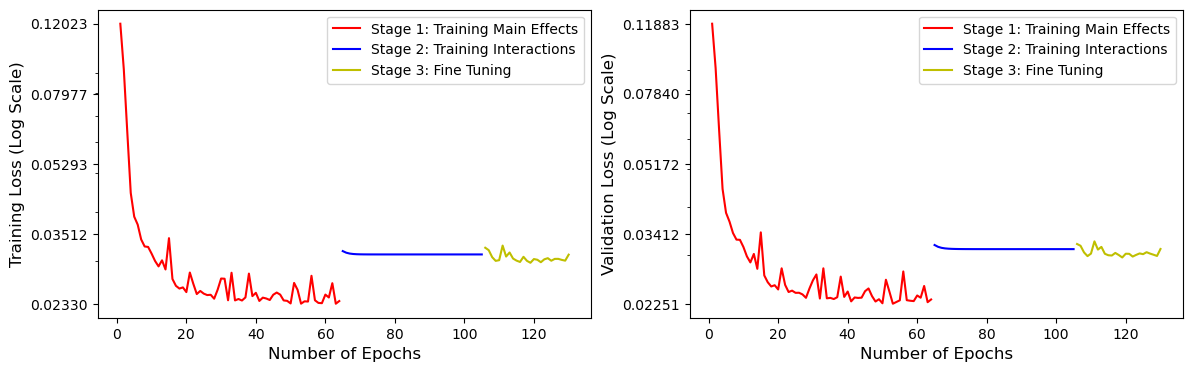

In [43]:
# Extract training logs for visualization
data_dict_logs = gami_mdl.summary_logs(save_dict=False)

# Plot training and validation loss trajectory over epochs
# Shows convergence behavior and checks for overfitting
plot_trajectory(data_dict_logs)

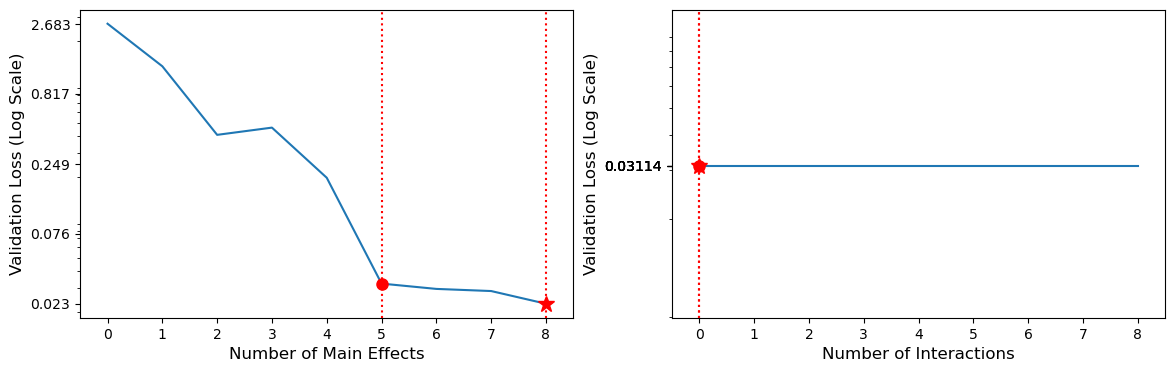

In [44]:
# Plot regularization effects during training
# Shows how model complexity is controlled
plot_regularization(data_dict_logs)

### Global Interpretation

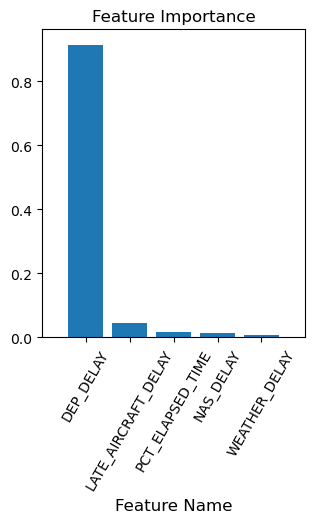

In [46]:
# Extract global explanations showing:
# - Main effects: how each feature individually affects predictions
# - Interaction effects: how pairs of features jointly affect predictions
data_dict_global = gami_mdl.global_explain(save_dict=False)

# Visualize feature importance rankings
# Shows which features and interactions are most influential
feature_importance_visualize(data_dict_global)
plt.show()

### Local Interpretation

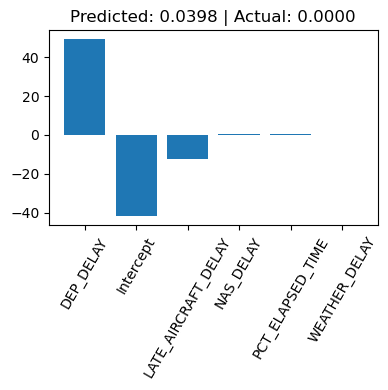

In [49]:
# Explain a single prediction (test example #73)
# Shows how each feature and interaction contributed to this specific prediction
data_dict_local = gami_mdl.local_explain(
    X_test_abbrev2[[73]],  # Single test instance
    y_test_class2[[73]]     # Actual label
)

# Visualize local explanation
# Bar chart showing positive/negative contributions of each component
local_visualize(data_dict_local[0])
plt.tight_layout()
plt.show()

### Performance

In [51]:
# Get predicted probabilities for test set
y_test_prob = gami_mdl.predict(X_test_abbrev2)

# Convert probabilities to binary predictions (threshold = 0.5)
y_test_pred = np.where(y_test_prob > 0.5, 1, 0)

# Calculate comprehensive performance metrics
print('accuracy: %.3g, recall: %.3g, roc auc: %.3g, f1: %.3g, mcc: %.3g' % (
    metrics.accuracy_score(y_test_class2, y_test_pred),      # Overall correctness
    metrics.recall_score(y_test_class2, y_test_pred),        # True positive rate
    metrics.roc_auc_score(y_test_class2, y_test_prob),       # Discrimination ability
    metrics.f1_score(y_test_class2, y_test_pred),            # Harmonic mean of precision/recall
    metrics.matthews_corrcoef(y_test_class2, y_test_pred)    # Correlation coefficient
))
# Results: accuracy: 0.99, recall: 0.933, roc auc: 0.998, f1: 0.92, mcc: 0.914
# GAMINet achieves excellent performance while maintaining interpretability

accuracy: 0.99, recall: 0.933, roc auc: 0.998, f1: 0.92, mcc: 0.914


In [53]:
# THE MISSION: PREDICTING FLIGHT DELAYS
#
# THE OVERT MISSION (THE "SETUP"):
# - Goal: Train models to predict preventable delays and understand their causes to improve OTP.
# - Apparent Result: A resounding SUCCESS!
#   - Regression models had RMSE well below the 15-minute delay threshold.
#   - Classification models achieved high F1 scores.
#   - White-box models successfully identified delay factors.
#
# ⚠ THE CRITICAL PLOT TWIST: A COMPLETE FAILURE
# - Despite high metrics, the mission FAILED.
# - How was this discovered? Through INTERPRETATION methods.
# - THE MISSION-CRITICAL LESSON: A model can be RIGHT FOR THE WRONG REASONS.
#   - High accuracy doesn't guarantee a model has learned the correct underlying patterns.
#   - The question "Why?" must be asked ALWAYS, not just when a model performs poorly.
#   - Interpretation is the toolset for asking "Why?".
#
# THE SECRET MISSION ("MISSION ACCOMPLISHED"):
# - The true purpose of the project was to experience and learn about common interpretation challenges.
# - If you understood these challenges, then the REAL mission was a success.
#
# KEY INTERPRETATION CHALLENGES REVEALED:
#
# 1. ⚠ SURFACE-LEVEL METHODS ARE INSUFFICIENT:
#    - Basic interpretation methods are not enough to uncover deep flaws.
#    - The "right for the wrong reasons" problem was only discovered using model-specific, global interpretation techniques.
#
# 2. ⚠ ASSUMPTIONS CAN DERAIL PROJECTS:
#    - Information supposed without evidence is dangerous.
#    - Domain experts are vital but can sometimes be mistaken.
#    - A core purpose of interpretability is to find and correct inconsistencies between expert assumptions and the reality within the data.
#
# 3. ⚠ FEATURE IMPORTANCE IS UNRELIABLE:
#    - Many model classes, including some white-box models, struggle to compute feature importance consistently and reliably.
#
# 4. ⚠ INCORRECT TUNING HURTS INTERPRETABILITY:
#    - A poorly tuned model might perform acceptably but be less interpretable.
#    - Key Insight: Regularization is a powerful tool because it often improves BOTH performance (by reducing overfitting) AND interpretability.
#
# 5. ⚠ THE PERFORMANCE-INTERPRETABILITY TRADE-OFF:
#    - This is a fundamental challenge in machine learning.
#    - The trade-off also extends to execution speed.
#    - This is why the focus is on BLACK-BOX MODELS: they offer the desired performance and speed,
#      but require special methods to improve their interpretability.
#
# CHAPTER SUMMARY & LOOKING FORWARD:
# - We covered traditional interpretation methods and their limitations.
# - We explored intrinsically interpretable models (white-box) and models that bridge the gap (glass-box).
# - We experienced the performance vs. interpretability trade-off firsthand.

In [54]:
# 1. MODEL PERFORMANCE COMPARISON:
#    - Neural Networks (MLP): Best accuracy but least interpretable
#    - Tree-based models: Good balance of accuracy and interpretability
#    - Linear models: Most interpretable but lower accuracy
#    - GAMs (EBM, GAMINet): Best of both worlds - high accuracy + interpretability

# 2. MOST IMPORTANT FEATURES:
#    - DEP_DELAY (departure delay): Strongest predictor across all models
#    - LATE_AIRCRAFT_DELAY: Second most important
#    - PCT_ELAPSED_TIME: Flight efficiency metric
#    - WEATHER_DELAY, NAS_DELAY: External factors

# 3. INTERPRETABILITY TECHNIQUES:
#    - Coefficients: Direct feature impact (linear/logistic regression)
#    - Feature importance: Relative ranking (trees, ensembles)
#    - Rules: IF-THEN conditions (RuleFit, decision trees)
#    - Shape functions: Non-linear relationships (GAMs)
#    - Local explanations: Individual prediction breakdowns

# 4. MODEL SELECTION GUIDANCE:
#    - Need maximum accuracy? → Neural networks or gradient boosting
#    - Need full interpretability? → Linear models or decision trees
#    - Need both? → EBM or GAMINet
#    - Handling imbalanced classes? → Use class weights or balanced sampling

# 5. PRACTICAL INSIGHTS:
#    - Class imbalance (6.1% delayed) requires careful metric selection
#    - Use ROC AUC and MCC instead of just accuracy
#    - Feature engineering (hub airports, temporal features) improves models
#    - Regularization prevents overfitting in complex models
#    - Always validate with held-out test set